In [1]:
import sys
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso



In [2]:
sys.path.append(os.path.abspath('../src'))
from lib import (
    #get_train_test_split,
    #get_trained_model,
    train_and_evaluate_models,
    create_eui_comparison_plots,
    evaluate_model_strategies,
    calculate_average_metrics,
    create_error_distribution_plots
)

In [3]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'hdd_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

#np.random.seed(123)
#merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])

# Train / Test

In [4]:
train_test_split_original_data_path = "../data/03_processed/train_test_split_original_data.csv"
train_test_split_original_data = pd.read_csv(train_test_split_original_data_path)

train_test_split_new_data_path = "../data/03_processed/train_test_split_new_data.csv"
train_test_split_new_data = pd.read_csv(train_test_split_new_data_path)

train_test_split = pd.concat([train_test_split_original_data, train_test_split_new_data], ignore_index=True)

merged_df = merged_df.merge(train_test_split, on=['index', 'geonameid'], how='left')

# We want to keep original data 
merged_df = merged_df[merged_df["source"] == "World Bank CURB"]

# Delete Image Null

In [5]:
print(merged_df.shape)

merged_df = merged_df.dropna(subset=['pca_result'])

print(merged_df.shape)

(481, 67)
(473, 67)


In [6]:
#feature_selection = "all_features"
feature_selection = "selected_features"

features = [
    "hdd_total_year", 
    "cdd_total_year", 
    # "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    # "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index",
    "2m_temperature_2023_avg",
    "2m_dewpoint_temperature_2023_avg",
    "total_precipitation_2023",
    # "longitude_sin", 
    # "longitude_cos", 
    # "latitude_sin", 
    # "latitude_cos",  
    # "population_density",

    # Image data

    # "pca_result", 
    # "K_mean_label", 
    # "C_mean_label", 
    # "GMM_label", 
    # "Cluster_1",
    # "Cluster_2", 
    # "Cluster_3",
    # "Cluster_4", 
    # "Cluster_5",
    # "Cluster_6", 
    # "Cluster_7", 
    # "Cluster_8", 
    # "Cluster_9", 
    # "Cluster_10",
    # "Cluster_11", 
    # "Cluster_12", 
    # "Cluster_13", 
    # "Cluster_14", 
    # "Cluster_15",
    # "Cluster_16", 
    # "Cluster_17", 
    # "Cluster_18", 
    # "Cluster_19"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    #"GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    #"Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU", 
    "Income index": "Income",
    "2m_temperature_2023_avg": "Temp",
    "2m_dewpoint_temperature_2023_avg": "Dew",
    "total_precipitation_2023": "Precip",
    # "longitude_sin": "Long_Sin", 
    # "longitude_cos": "Long_Cos", 
    # "latitude_sin": "Lat_Sin", 
    # "latitude_cos": "Lat_Cos",  
    "population_density": "Pop_Dens",
    # "pca_result": "PCA",
    # "Cluster_1": "C1",
    # "Cluster_2": "C2",
    # "Cluster_3": "C3",
    # "Cluster_4": "C4",
    # "Cluster_5": "C5",
    # "Cluster_6": "C6",
    # "Cluster_7": "C7",
    # "Cluster_8": "C8",
    # "Cluster_9": "C9",
    # "Cluster_10": "C10",
    # "Cluster_11": "C11",
    # "Cluster_12": "C12",
    # "Cluster_13": "C13",
    # "Cluster_14": "C14",
    # "Cluster_15": "C15",
    # "Cluster_16": "C16",
    # "Cluster_17": "C17",
    # "Cluster_18": "C18",
    # "Cluster_19": "C19"
}


target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

regions = ['Asia & Oceania', 'Europe', 'Africa', 'Central and South America', 'Northern America']


# Linear Regression 

### Linear Regression - Within Domain

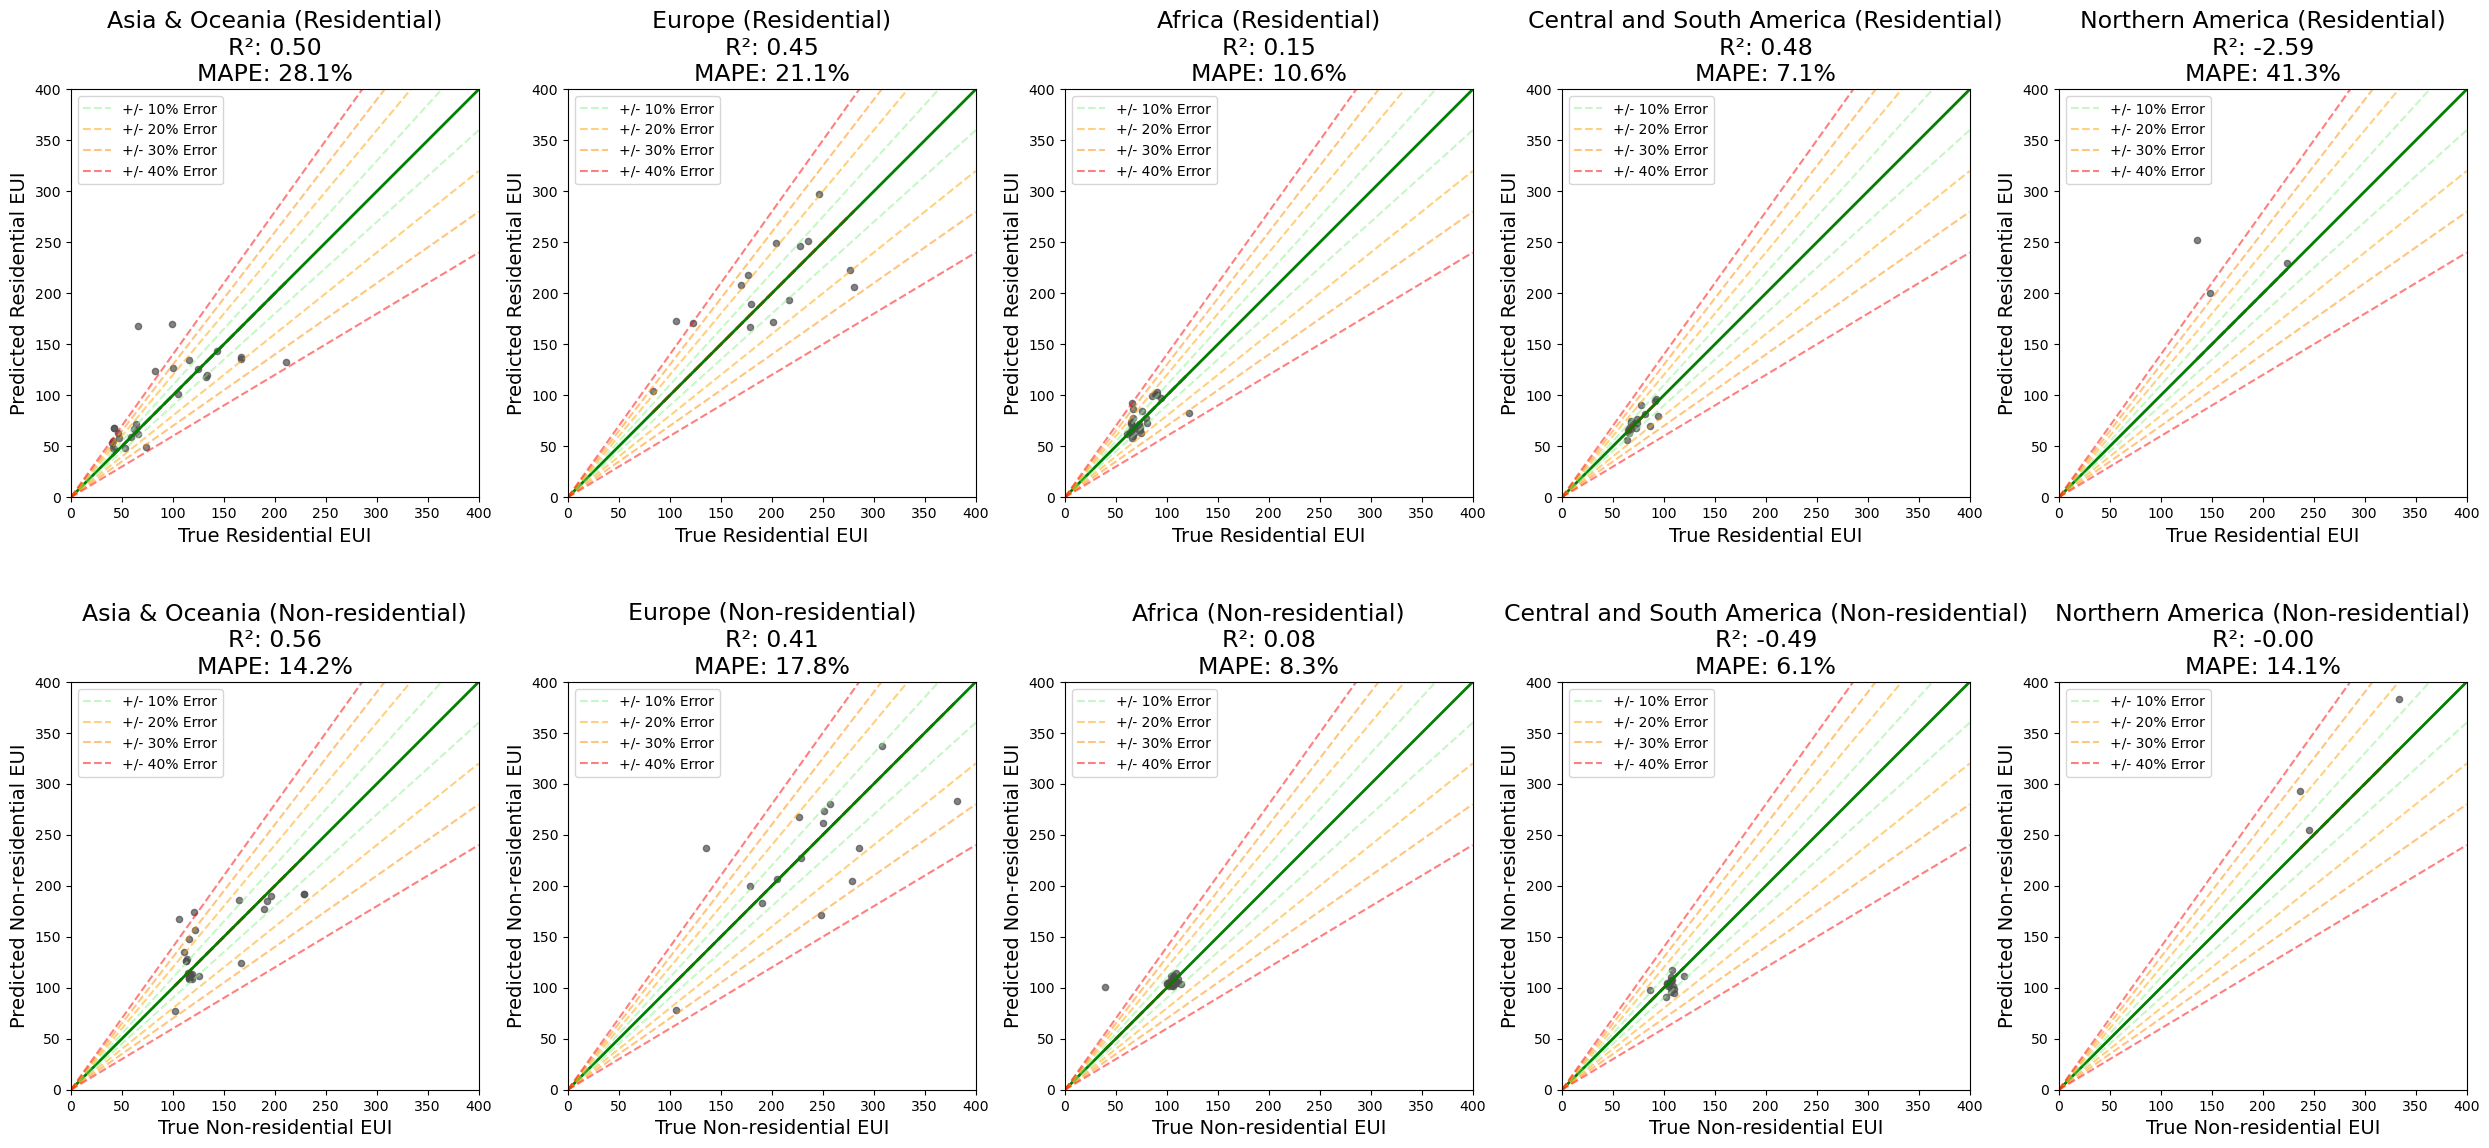

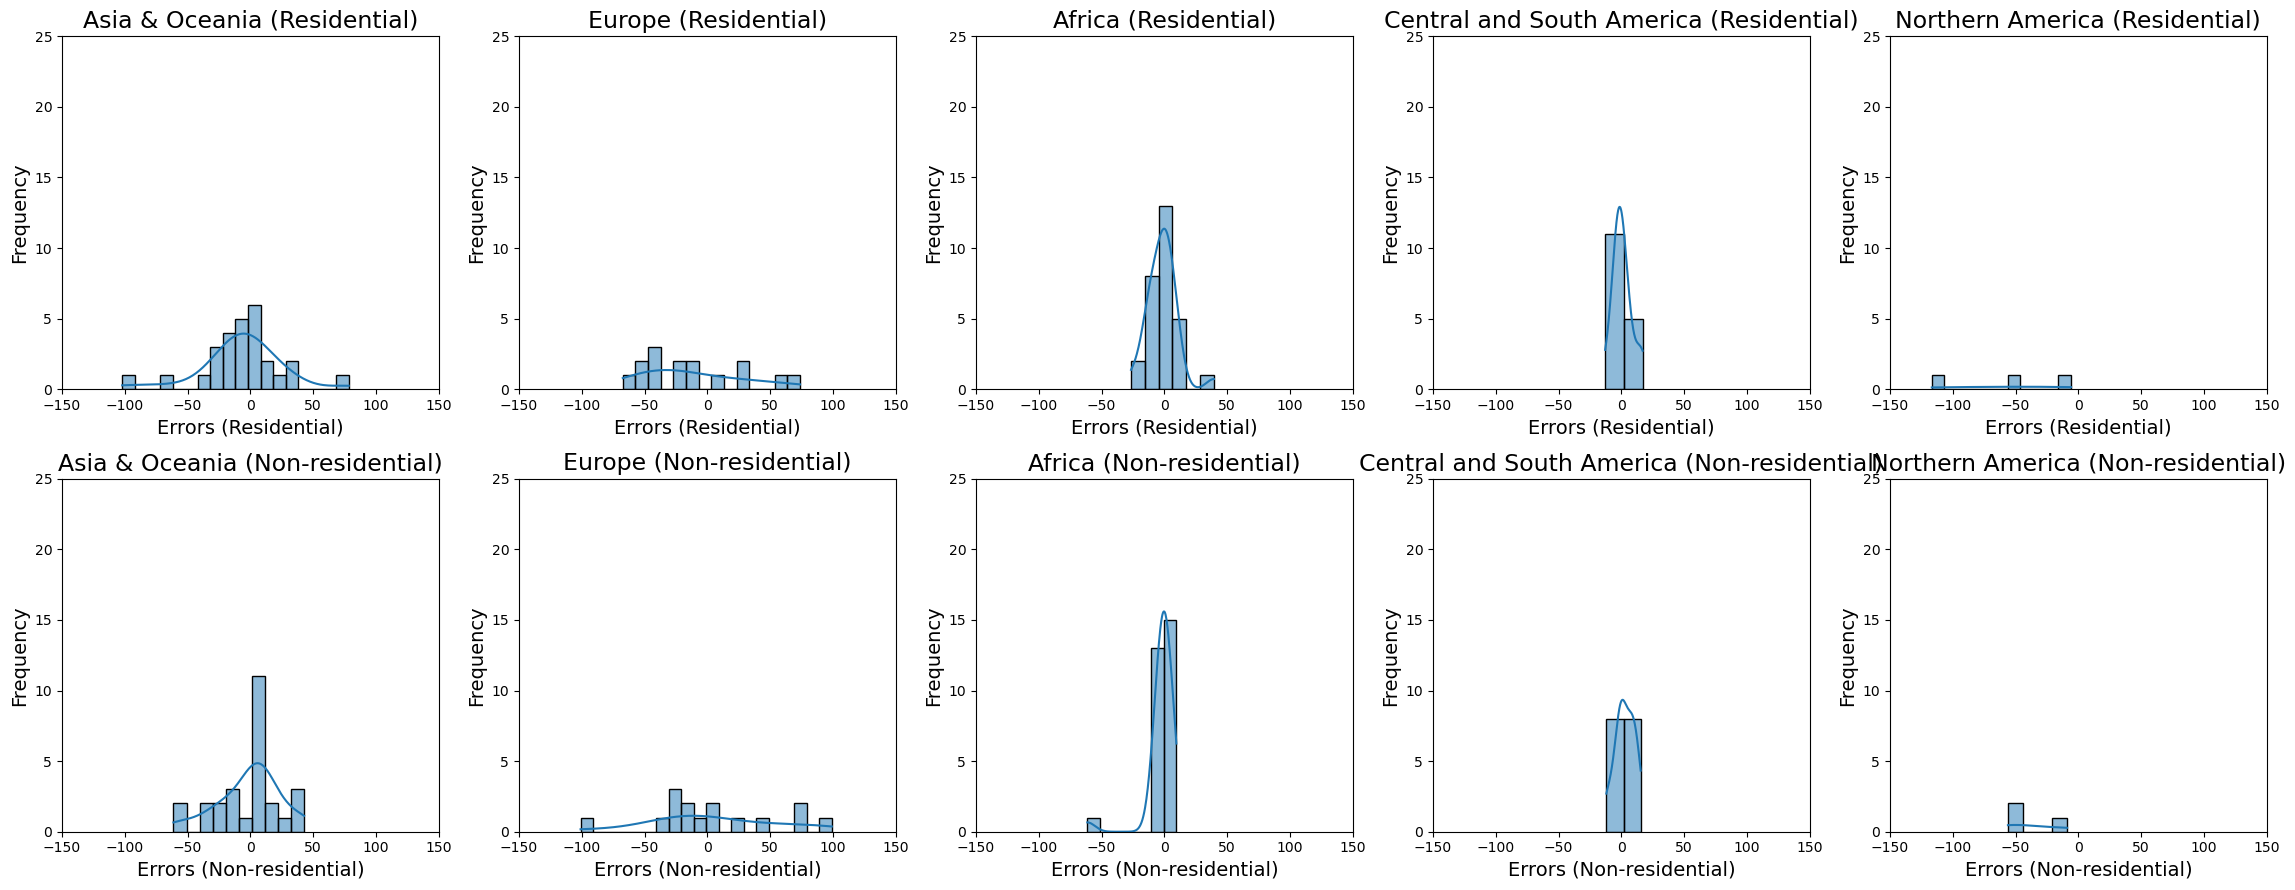

In [7]:
# Within-domain
model_lr_within = LinearRegression()
results_lr_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lr_within,
    strategy='within_domain'
)

create_eui_comparison_plots(
    results_lr_within, 
    save_path=f'../figures/model_plots/{feature_selection}/lr_within_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lr_within,
    save_path=f'../figures/model_plots/{feature_selection}/lr_within_domain_error_distribution.png'
)

### Linear Regression - Cross Domain

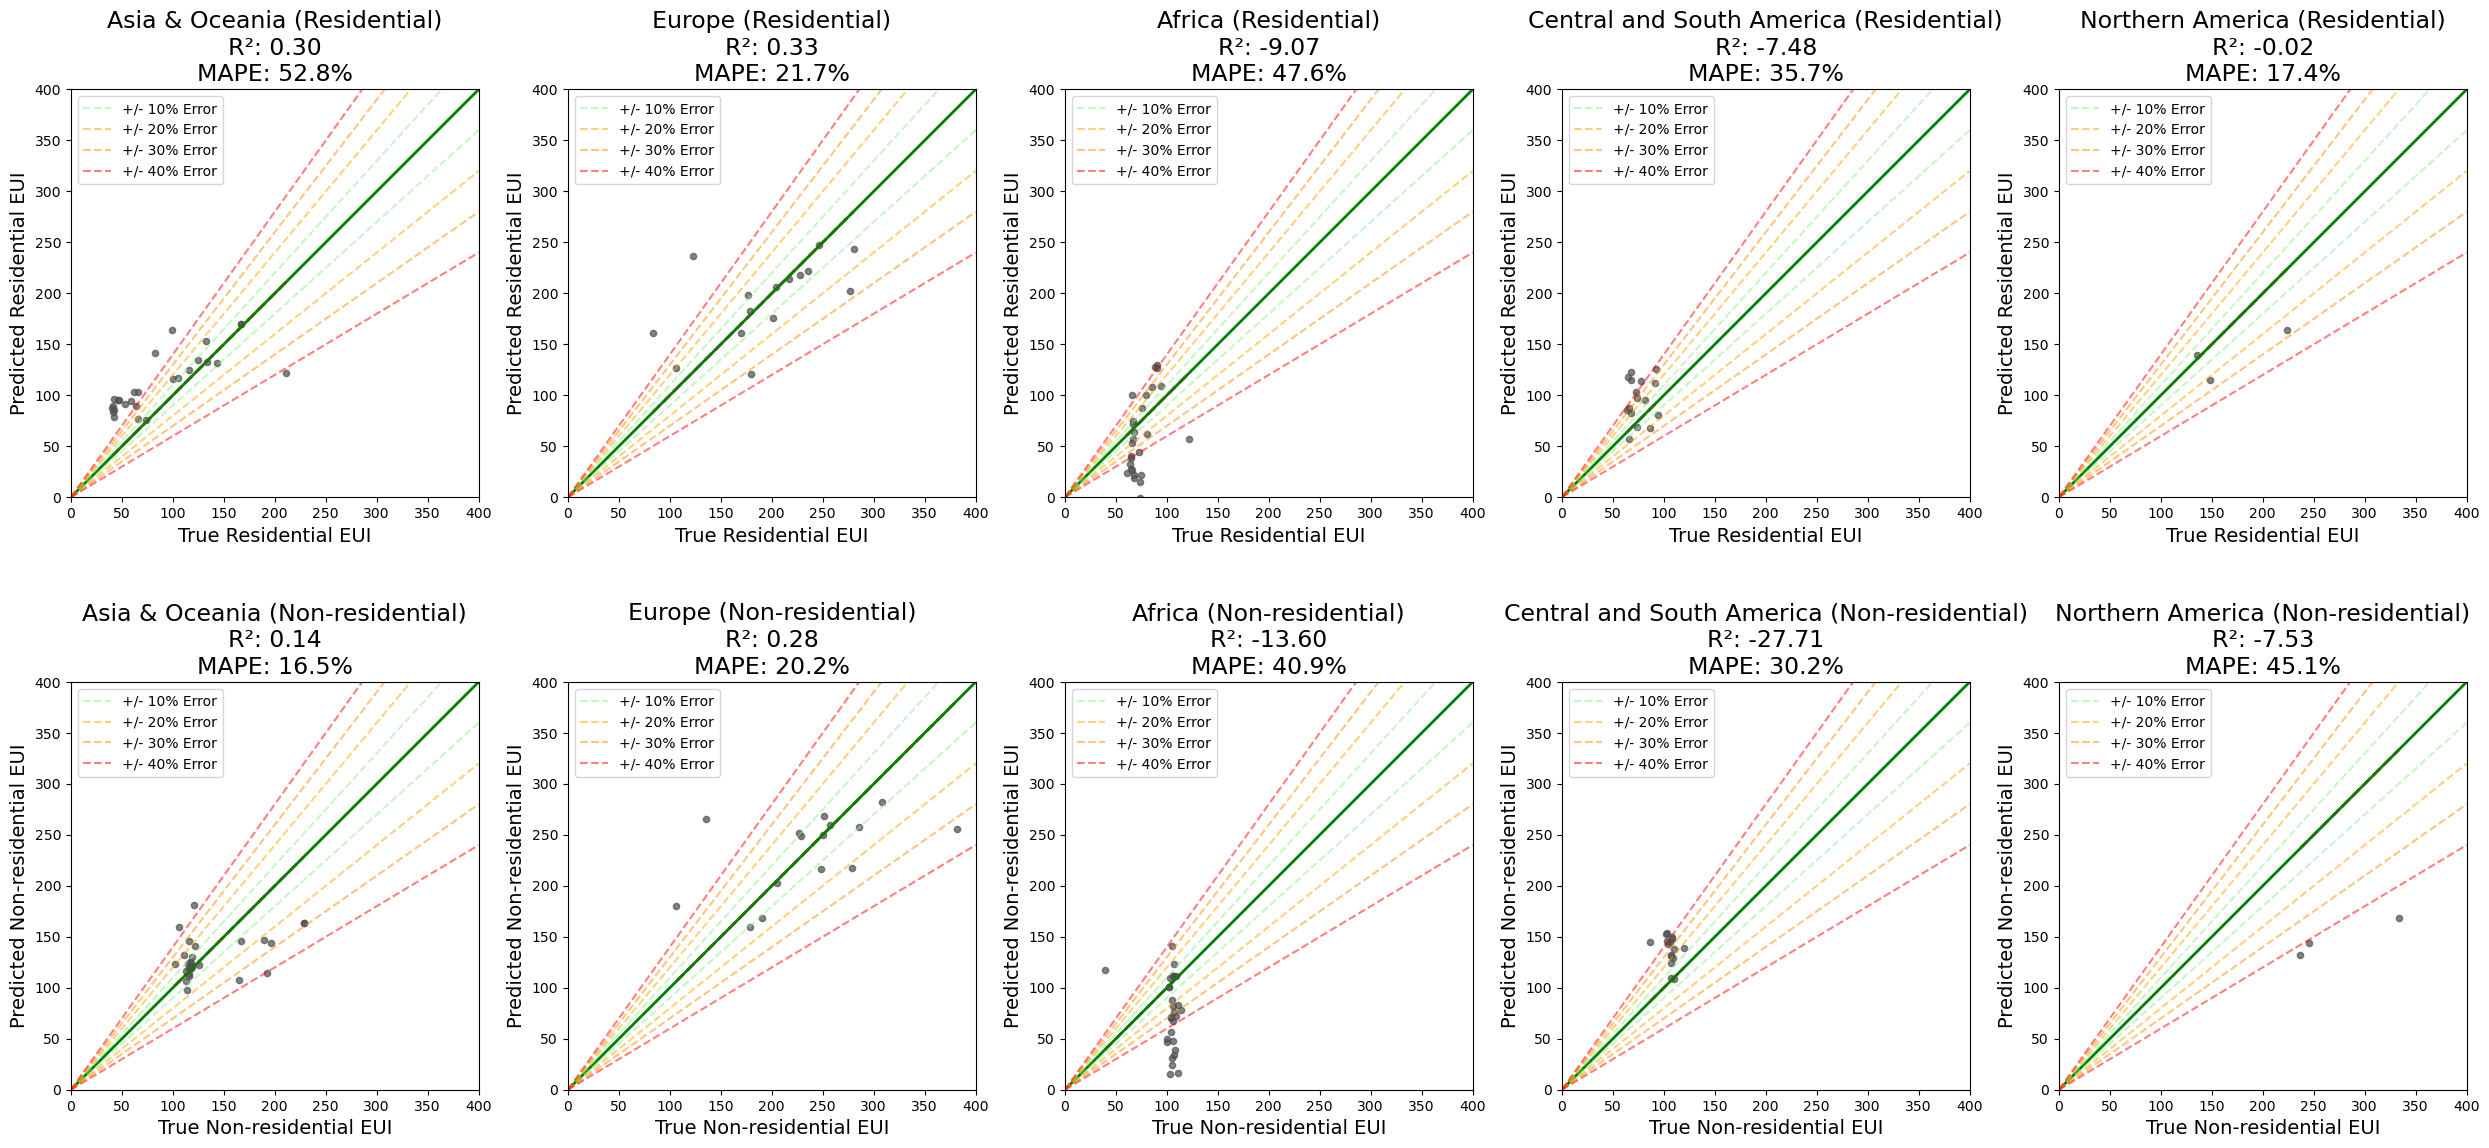

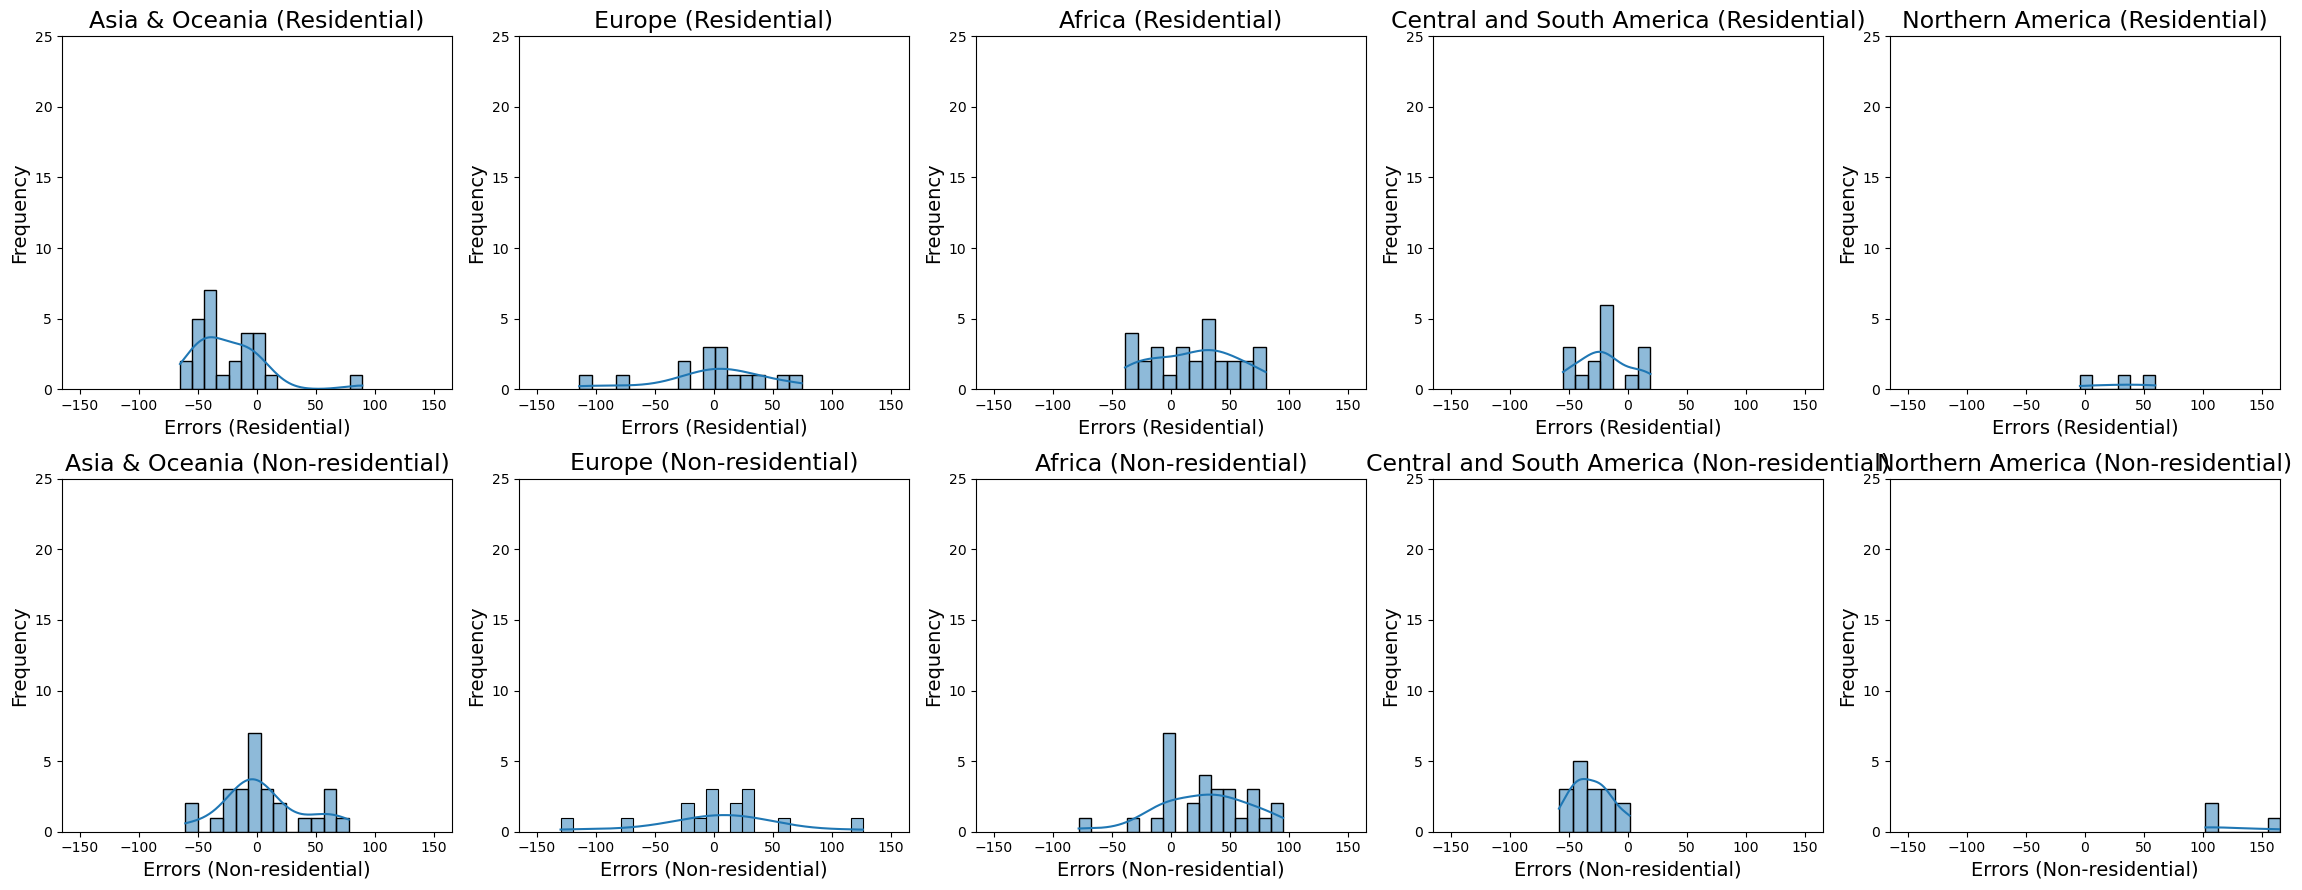

In [8]:
# Cross-domain 
model_lr_cross = LinearRegression()
results_lr_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lr_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(
    results_lr_cross,
    save_path=f'../figures/model_plots/{feature_selection}/lr_cross_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lr_cross,
    save_path=f'../figures/model_plots/{feature_selection}/lr_cross_domain_error_distribution.png'
)


### Linear Regression - All Domain

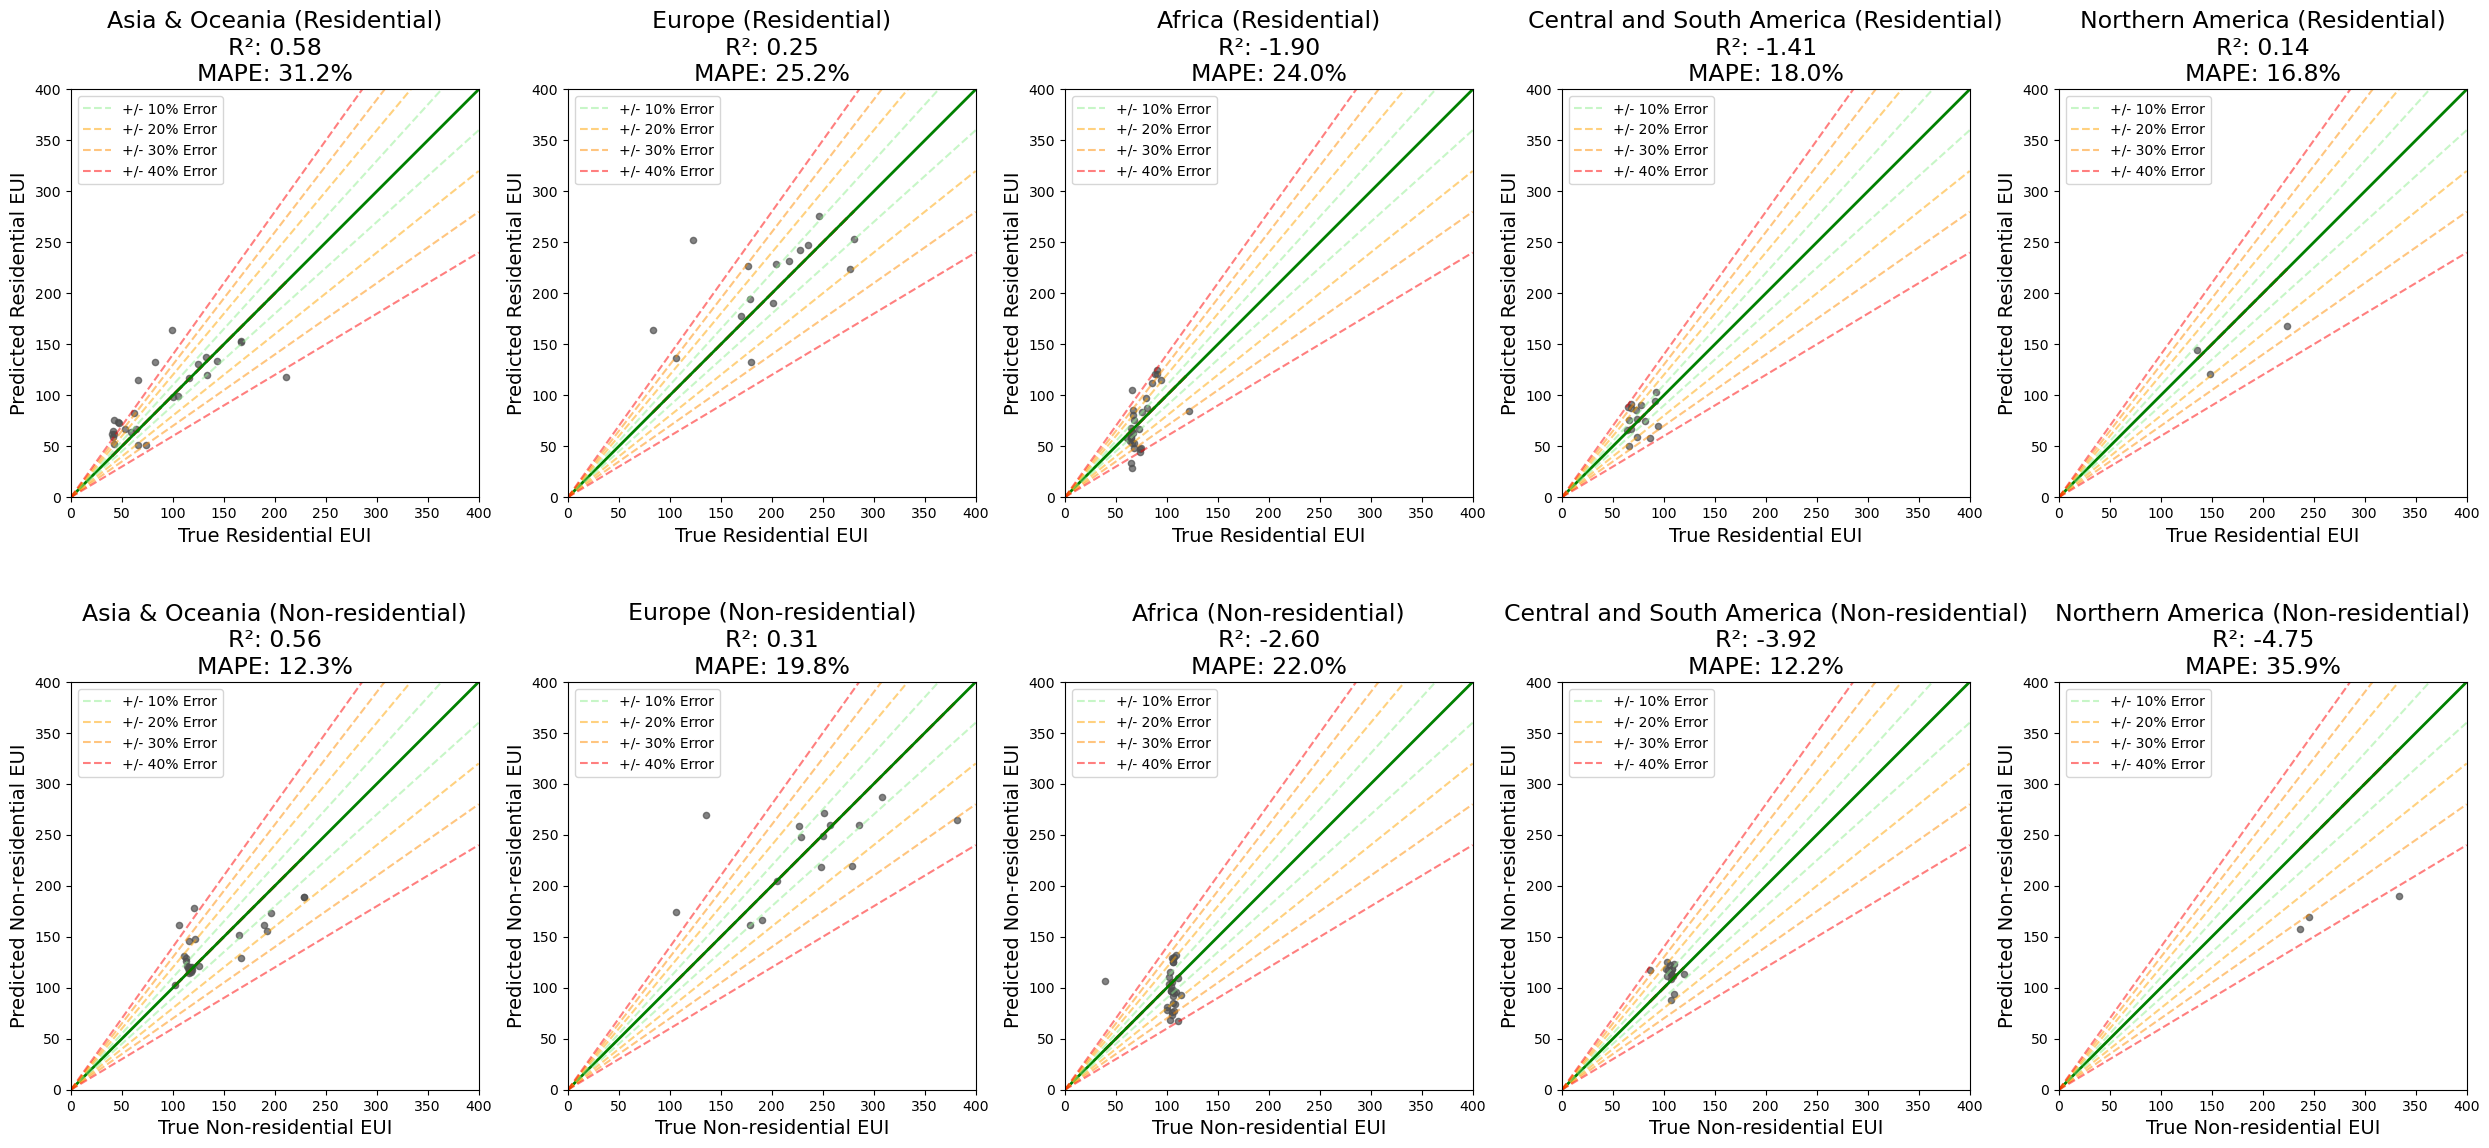

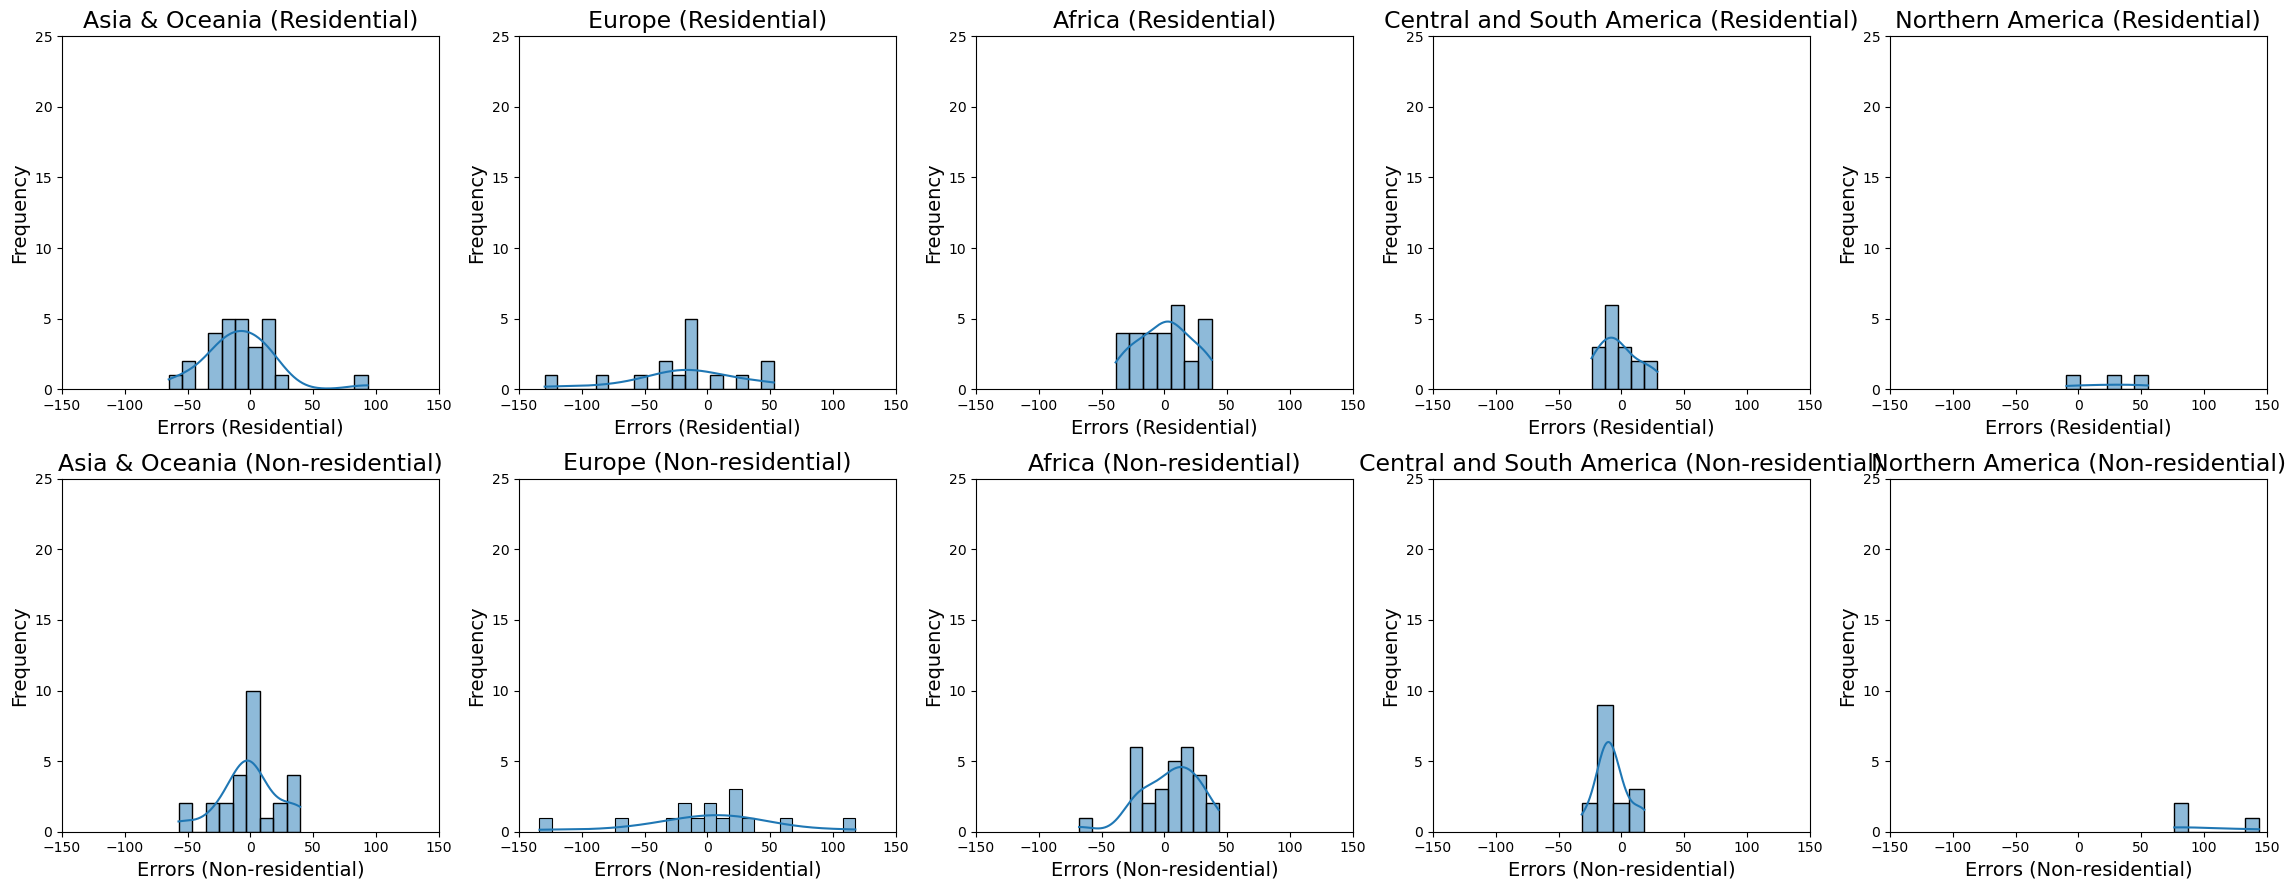

In [9]:
# All-domain
model_lr_all = LinearRegression()
results_lr_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lr_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(
    results_lr_all,
    save_path=f'../figures/model_plots/{feature_selection}/lr_all_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lr_all,
    save_path=f'../figures/model_plots/{feature_selection}/lr_all_domain_error_distribution.png'
)


In [10]:
lr_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LinearRegression,
   feature_abbreviations=feature_abbreviations,
   model_details="No regularization"
)

lr_average_results = calculate_average_metrics(lr_detailed_results).reset_index()
lr_average_results

Target       Strategy             Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LinearRegression   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
2  Non-residential EUI (kWh/m2/year)     all_domain  LinearRegression   
3      Residential EUI (kWh/m2/year)  within_domain  LinearRegression   
4      Residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
5      Residential EUI (kWh/m2/year)     all_domain  LinearRegression   

       Model Details                                      Features Used  \
0  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   
1  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   
2  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   
3  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   
4  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   
5  No regularization  hdd_total_year, cdd_total_year, Urbanization_R...   

                                Features Abbreviated   MAPE     R²       MSE  \
0  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  12.10  0.112  1059.870   
1  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  30.58 -9.683  4811.246   
2  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  20.44 -2.078  3059.722   
3  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  21.64 -0.204  1693.157   
4  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  35.04 -3.188  1541.238   
5  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  23.04 -0.467  1058.184   

     RMSE     MAE   WAPE  
0  27.814  21.502  11.06  
1  60.164  51.548  29.44  
2  44.432  37.481  19.26  
3  33.540  26.160  19.40  
4  38.922  31.283  30.56  
5  30.502  24.204  20.90

In [11]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
lr_detailed_results.to_csv(f'../results/{feature_selection}/{timestamp}_lr_detailed_results.csv')
lr_average_results.to_csv(f'../results/{feature_selection}/{timestamp}_lr_average_results.csv')

# 

# Linear Regression - Ridge regularization

In [12]:
ridge_params = {
    'alpha': 1.0,          # regularization strength
   # 'fit_intercept': True, # include bias term
   # 'max_iter': 1000,      # maximum iterations
   # 'tol': 1e-3,          # tolerance for optimization
   # 'solver': 'auto',      # solver algorithm
   # 'random_state': 42     # for reproducibility
}

### Linear Regression - Ridge - Within Domain

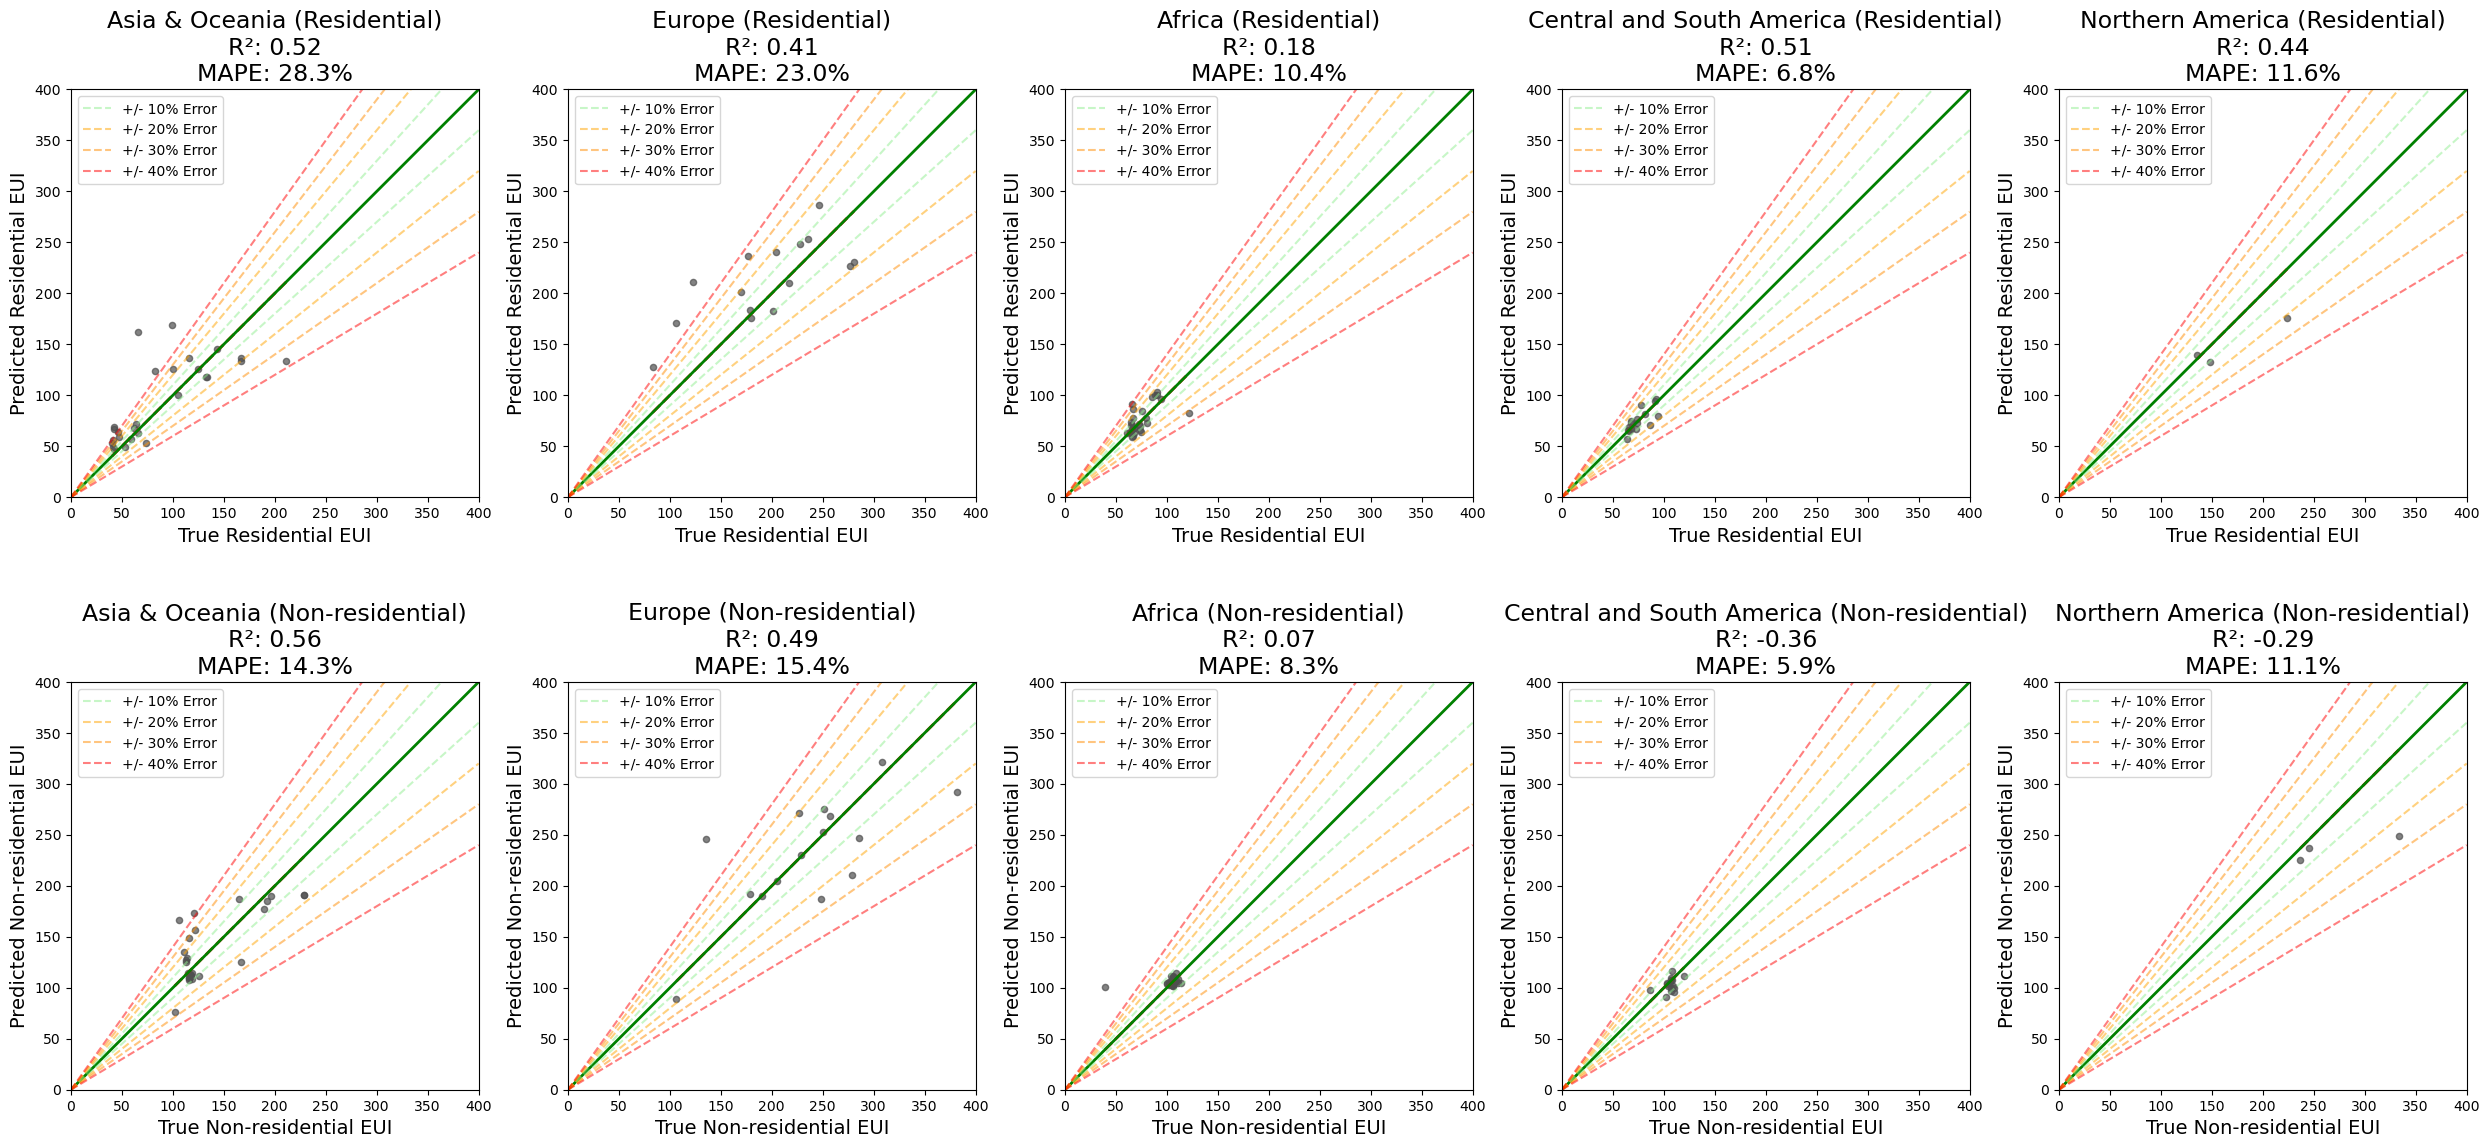

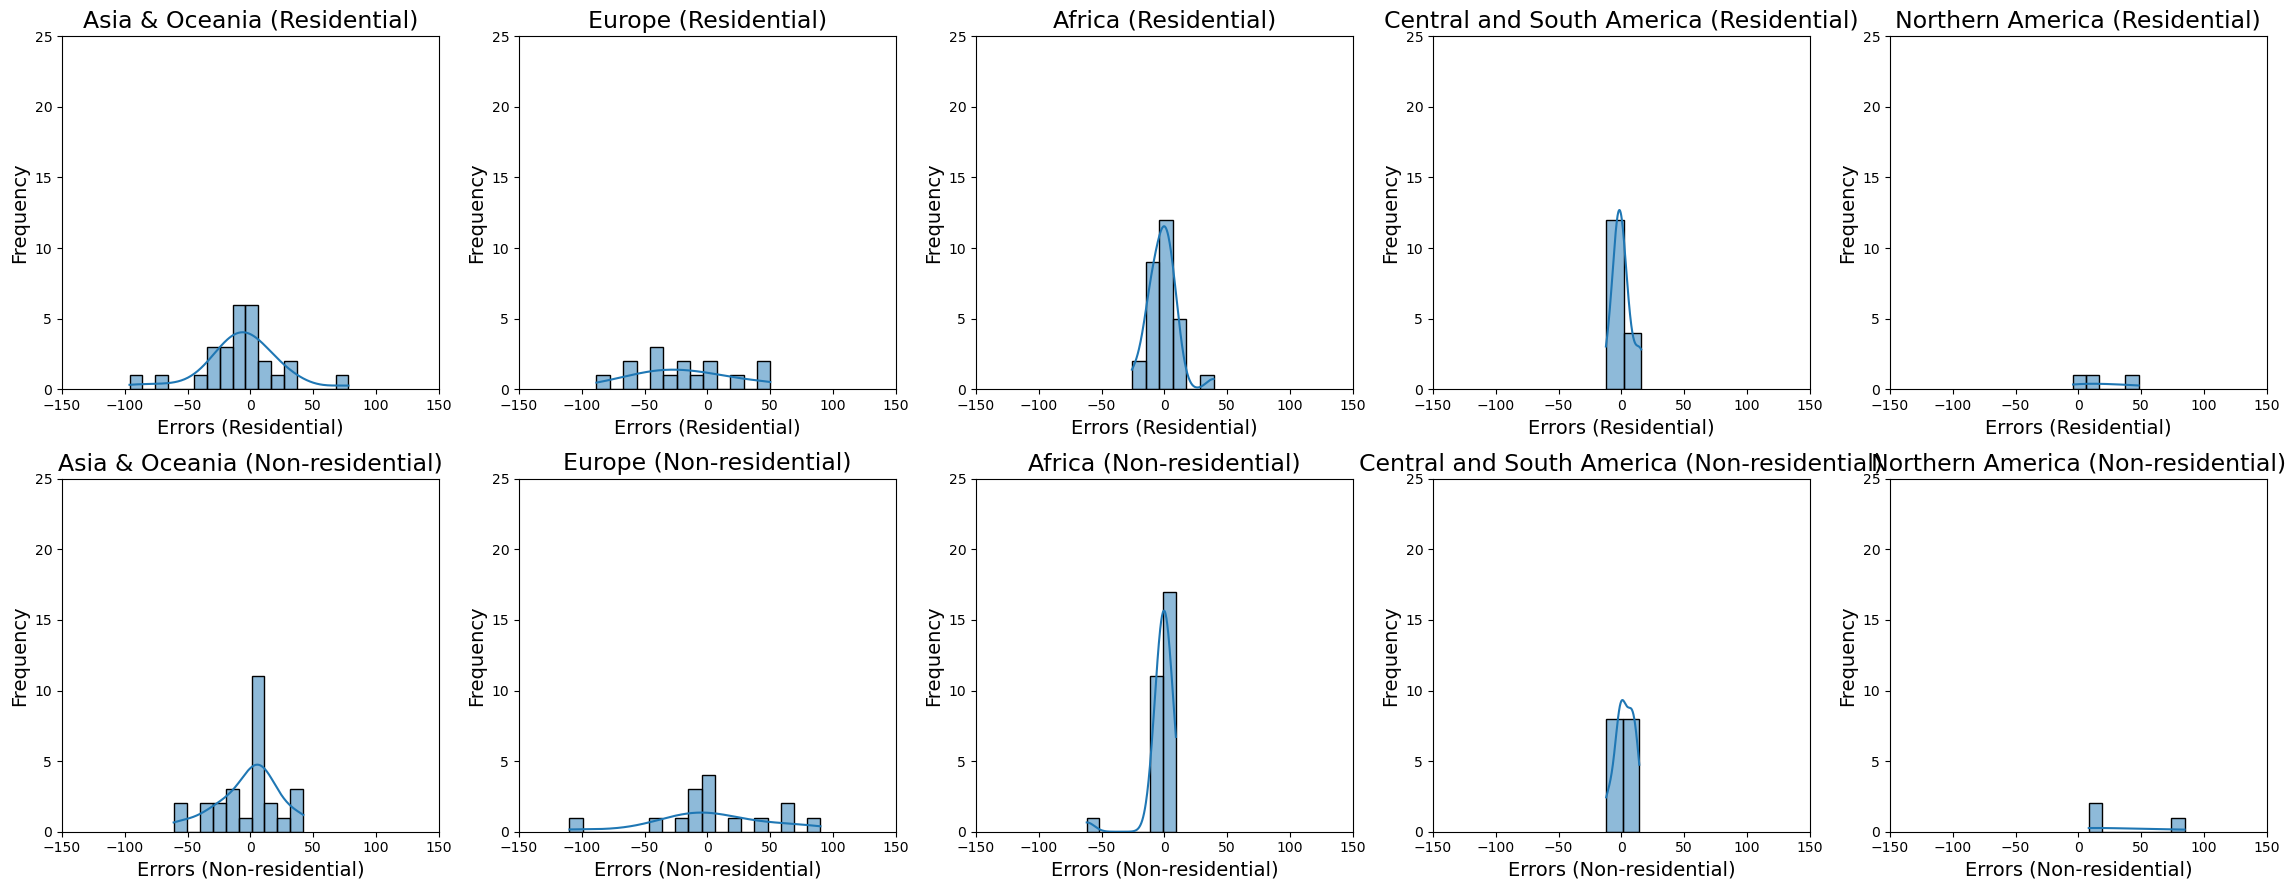

In [13]:
# Within-domain with Ridge
model_ridge_within = Ridge(**ridge_params)
results_ridge_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_ridge_within,
    strategy='within_domain'
)

create_eui_comparison_plots(
    results_ridge_within, 
    save_path=f'../figures/model_plots/{feature_selection}/ridge_within_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_ridge_within,
    save_path=f'../figures/model_plots/{feature_selection}/ridge_within_domain_error_distribution.png'
)

### Linear Regression - Ridge - Cross Domain

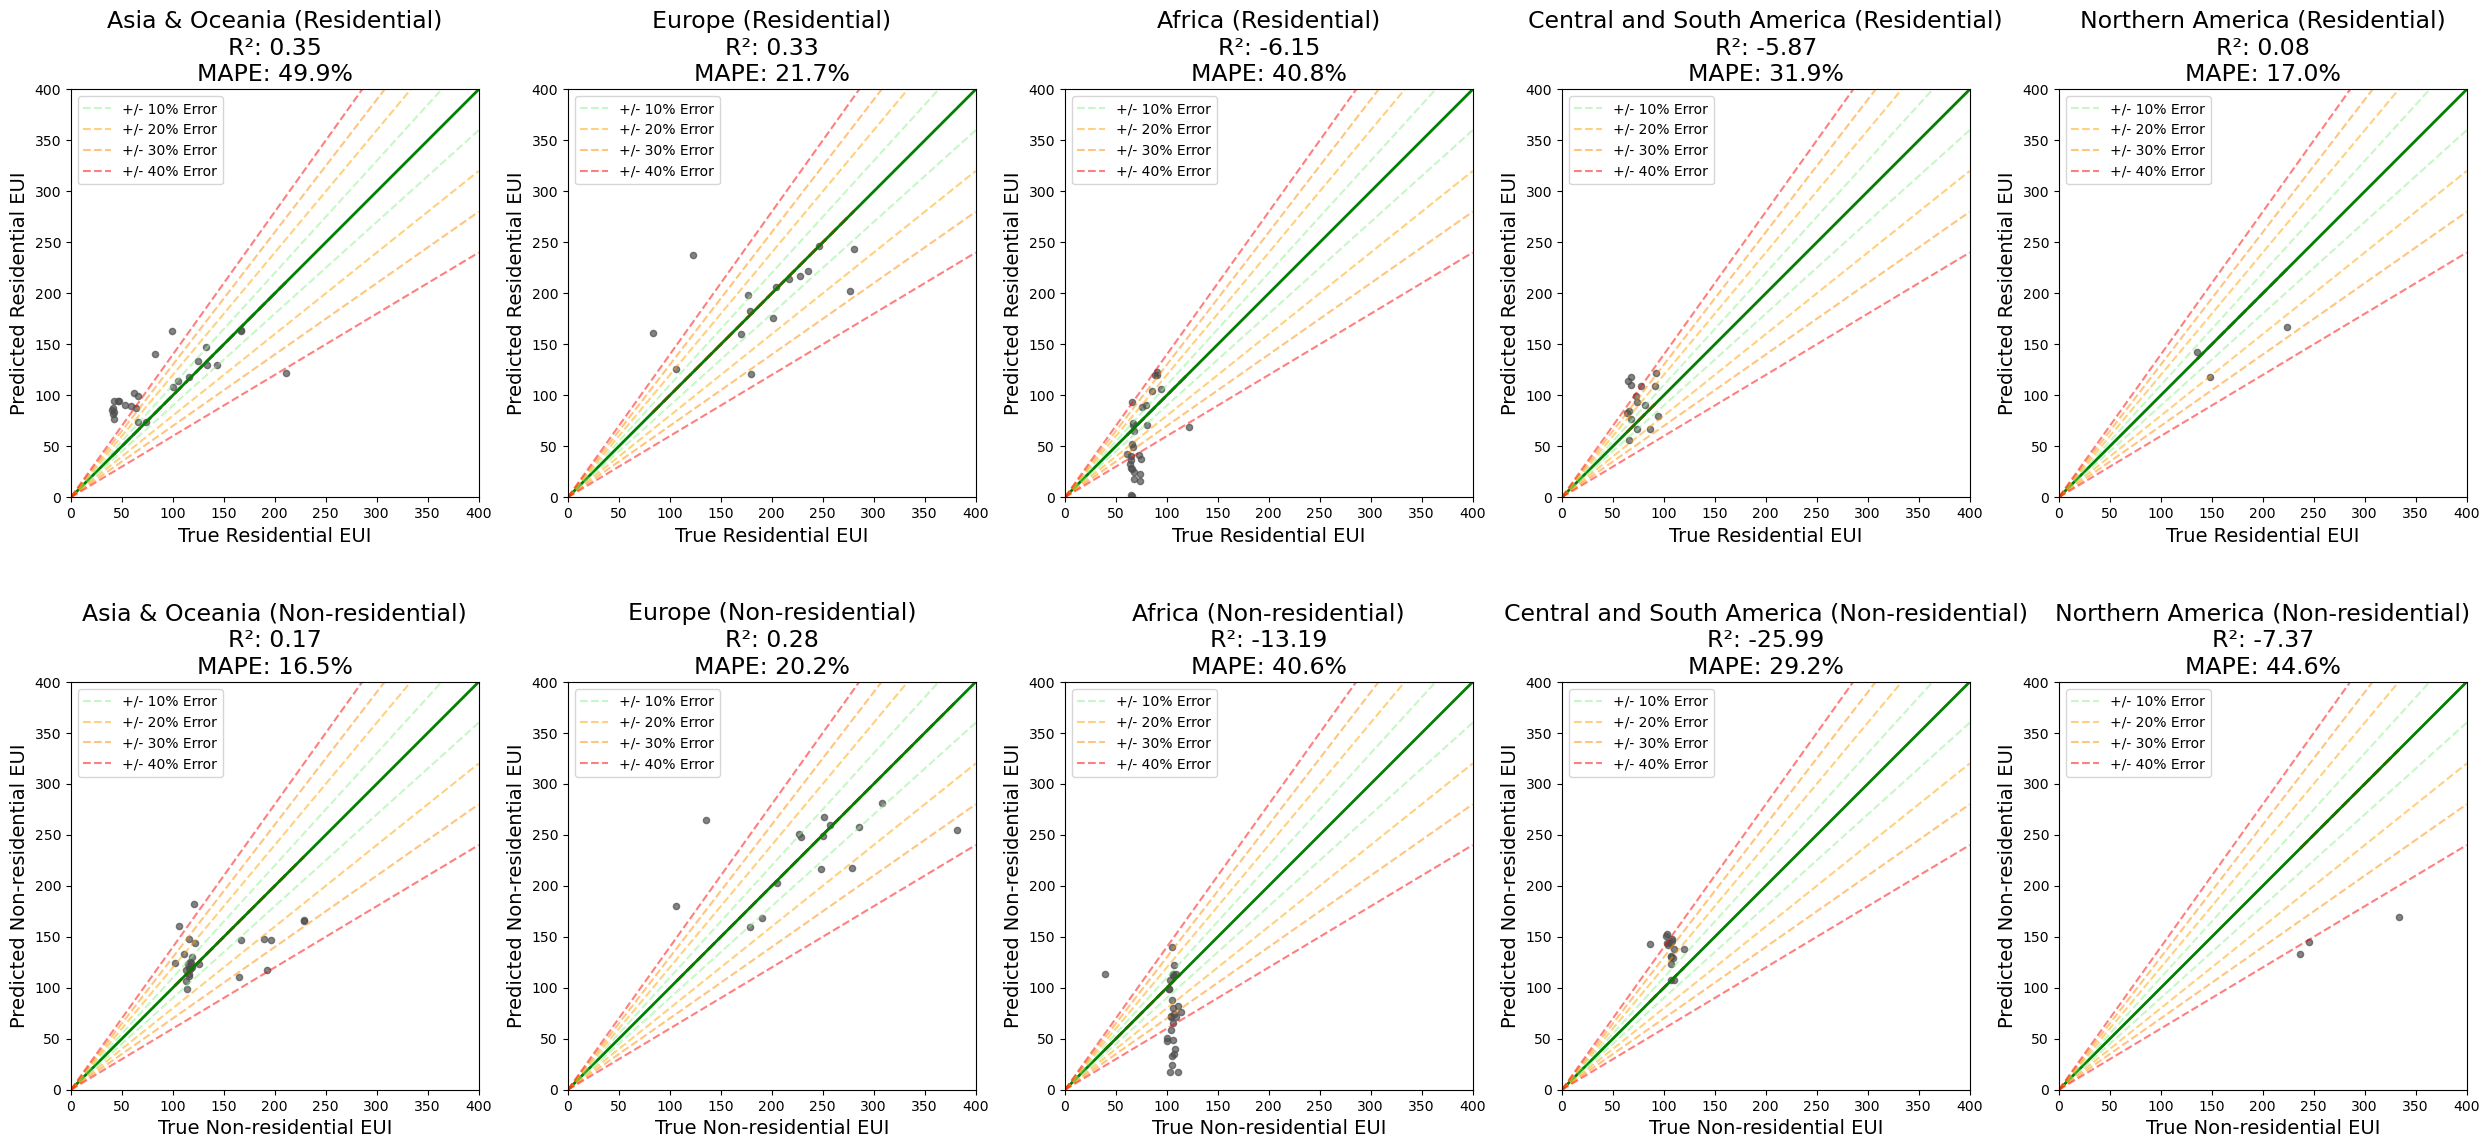

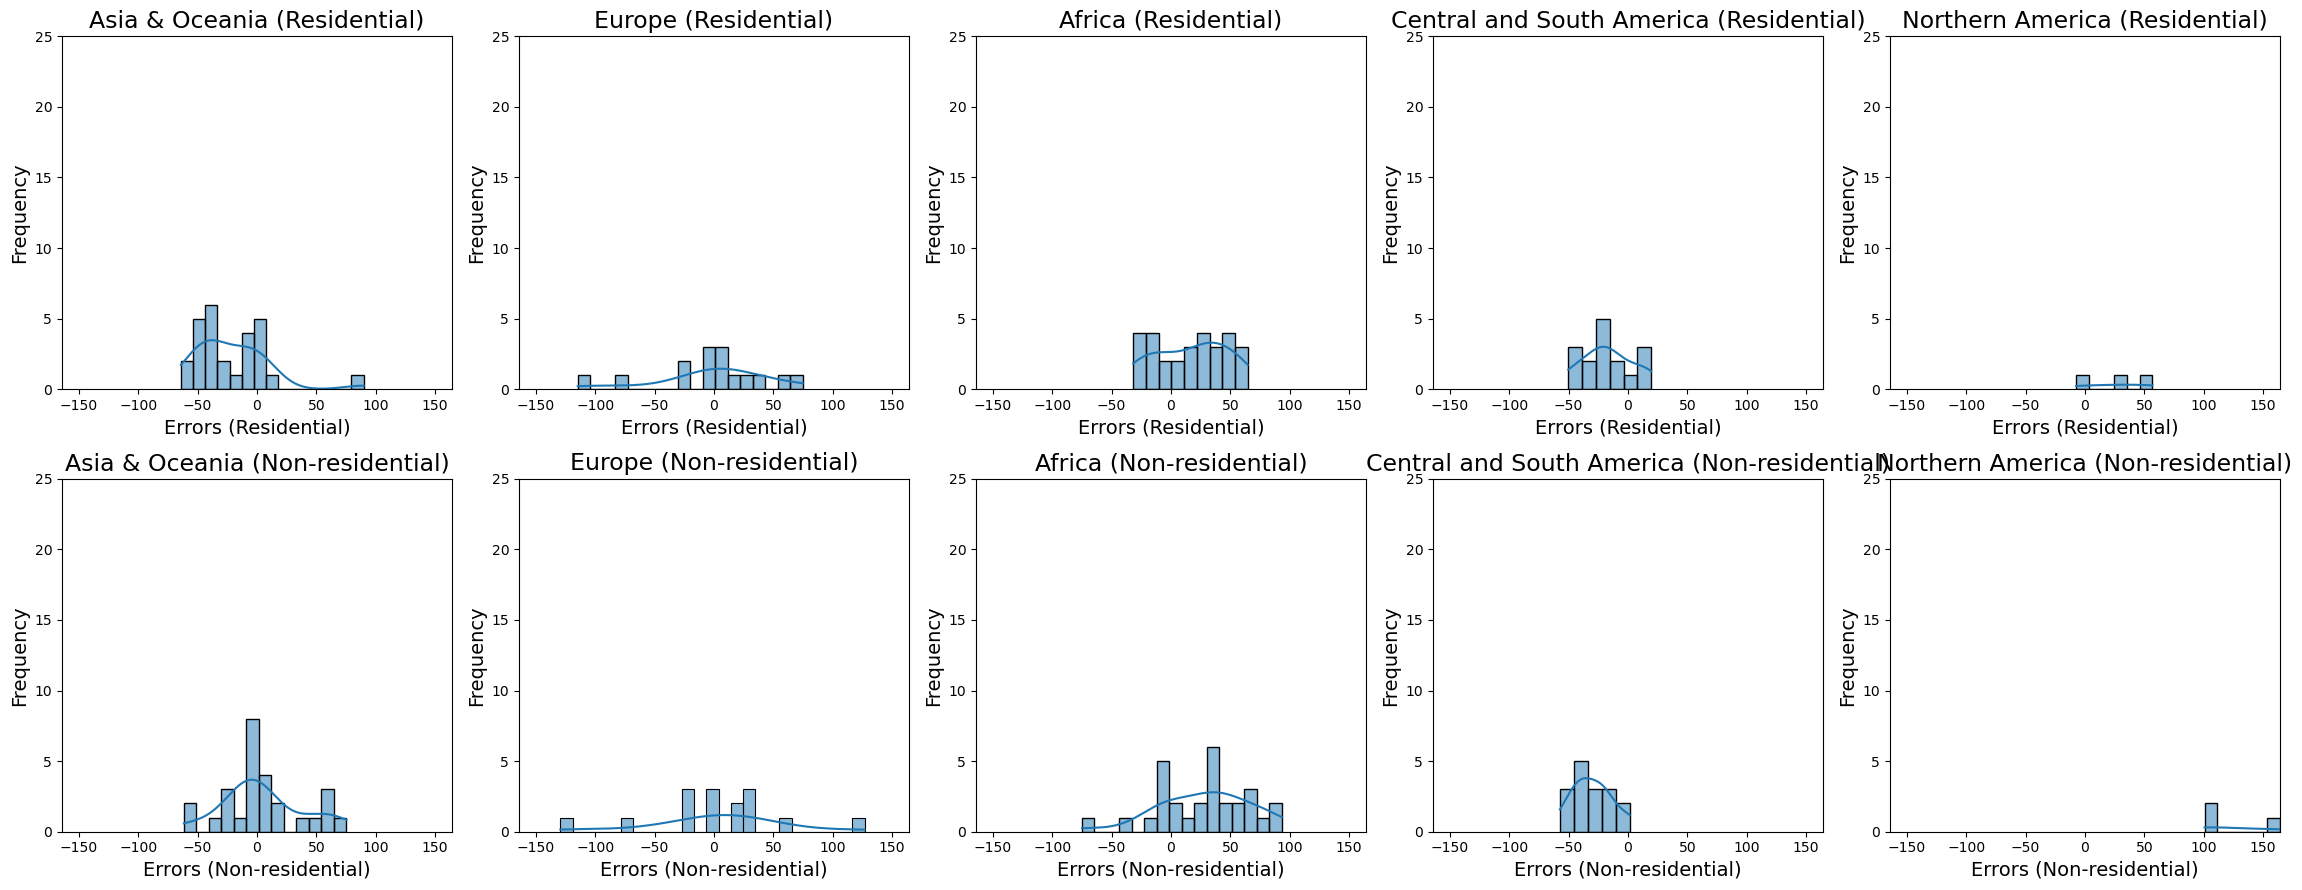

In [14]:
# Cross-domain with Ridge
model_ridge_cross = Ridge(**ridge_params)
results_ridge_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_ridge_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(
    results_ridge_cross,
    save_path=f'../figures/model_plots/{feature_selection}/ridge_cross_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_ridge_cross,
    save_path=f'../figures/model_plots/{feature_selection}/ridge_cross_domain_error_distribution.png'
)

### Linear Regression - Ridge - All Domain

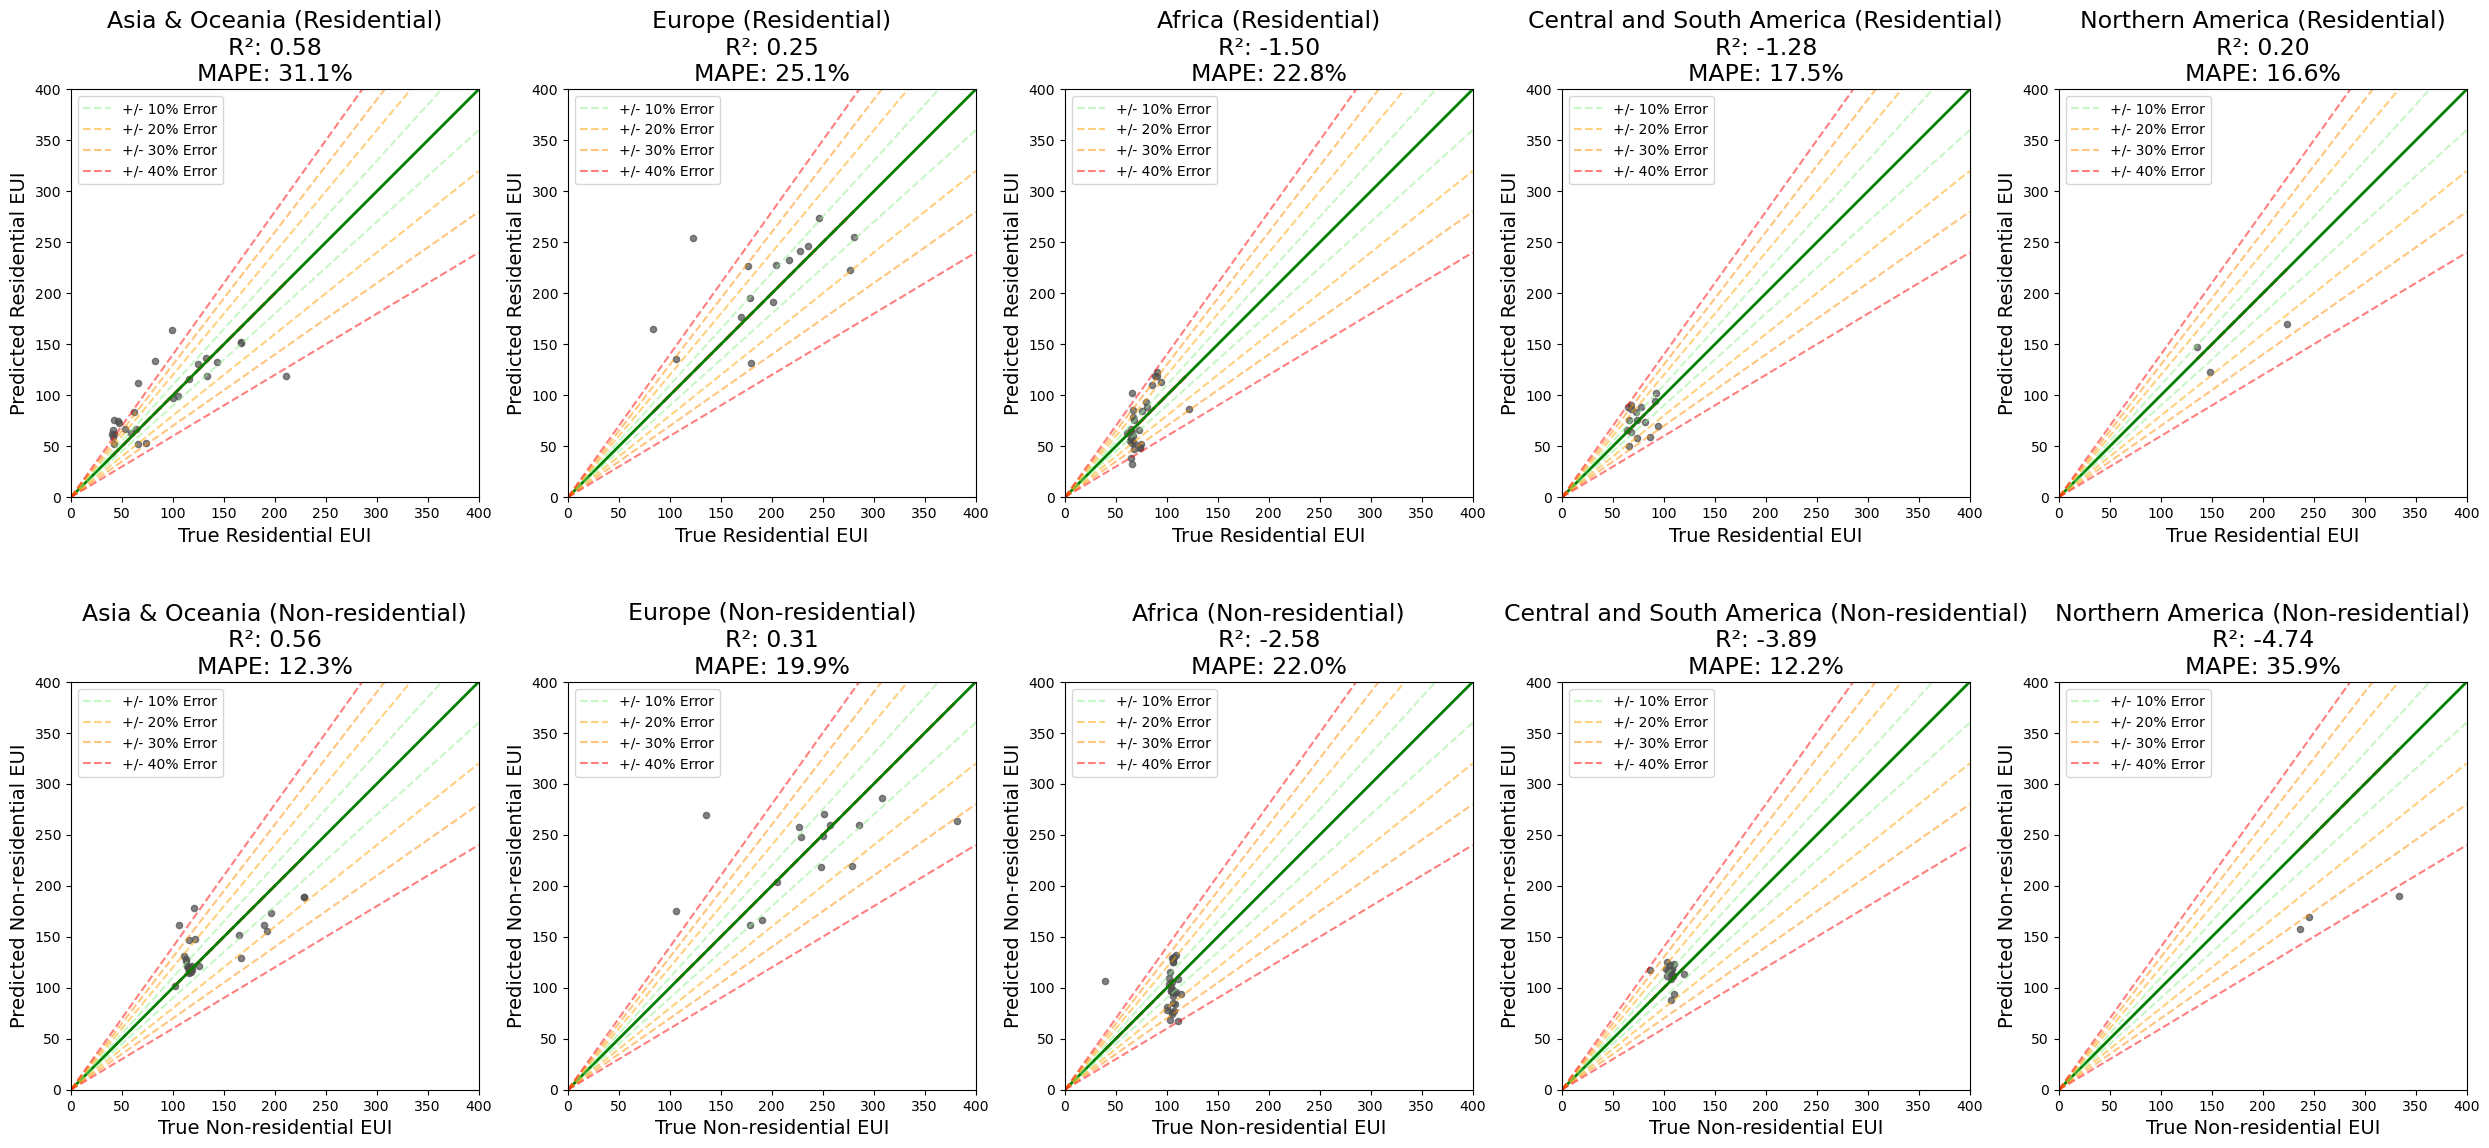

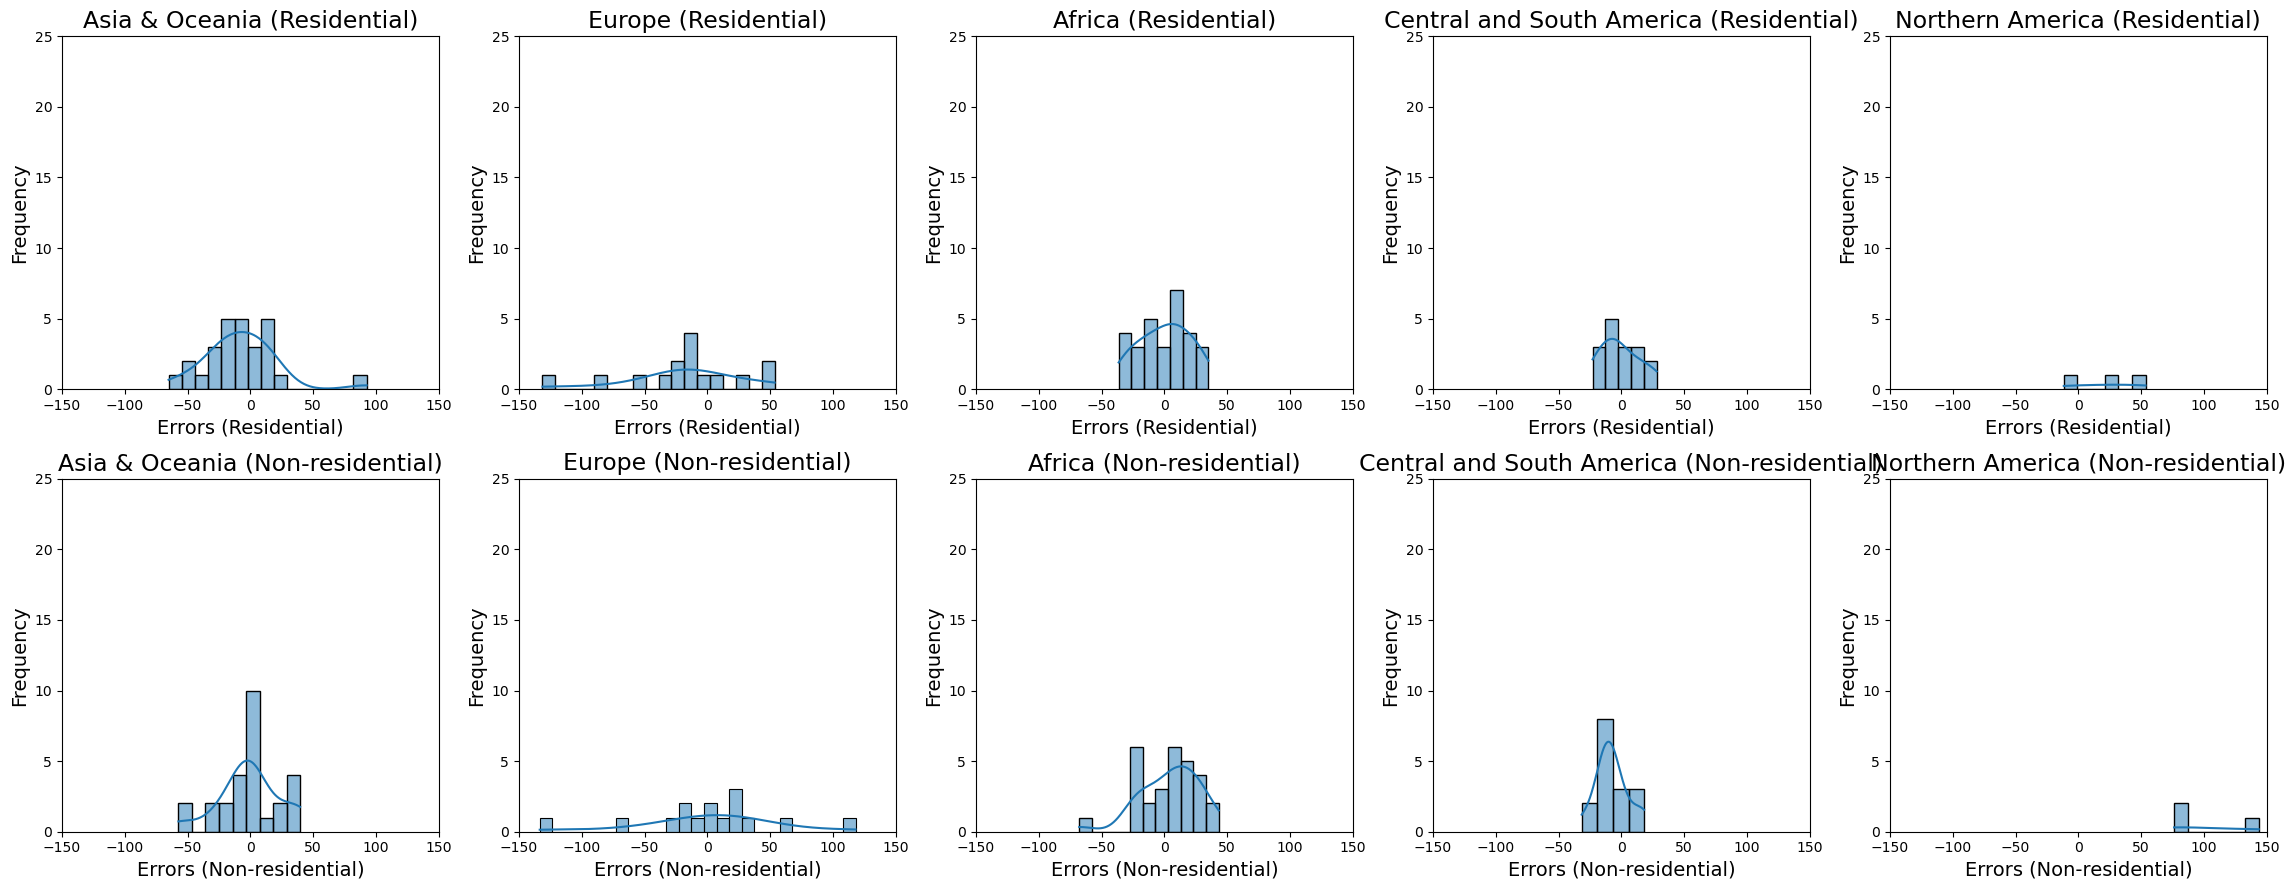

In [15]:
model_ridge_all = Ridge(**ridge_params)
results_ridge_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_ridge_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(
    results_ridge_all,
    save_path=f'../figures/model_plots/{feature_selection}/ridge_all_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_ridge_all,
    save_path=f'../figures/model_plots/{feature_selection}/ridge_all_domain_error_distribution.png'
)


In [16]:
RidgeModel = lambda: Ridge(**ridge_params)

ridge_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=RidgeModel,
   feature_abbreviations=feature_abbreviations,
   model_details="Ridge, " + ", ".join(f"{k}={v}" for k, v in ridge_params.items())
)
ridge_detailed_results['Model'] = 'LR Ridge'
ridge_average_results = calculate_average_metrics(ridge_detailed_results).reset_index()

ridge_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Ridge   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Ridge   
3      Residential EUI (kWh/m2/year)  within_domain  LR Ridge   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
5      Residential EUI (kWh/m2/year)     all_domain  LR Ridge   

      Model Details                                      Features Used  \
0  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
1  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
2  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
3  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
4  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
5  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, Urbanization_R...   

                                Features Abbreviated   MAPE     R²       MSE  \
0  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  11.00  0.095  1099.055   
1  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  30.22 -9.221  4714.724   
2  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  20.46 -2.067  3053.444   
3  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  16.02  0.412   788.226   
4  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  32.26 -2.251  1360.709   
5  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  22.62 -0.349  1026.483   

     RMSE     MAE   WAPE  
0  28.233  19.576  10.28  
1  59.438  51.028  29.08  
2  44.389  37.435  19.24  
3  24.682  18.817  15.02  
4  36.380  29.143  27.94  
5  29.857  23.774  20.46

In [17]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

ridge_detailed_results.to_csv(f'../results/{feature_selection}/{timestamp}_ridge_detailed_results.csv')
ridge_average_results.to_csv(f'../results/{feature_selection}/{timestamp}_ridge_average_results.csv')


# Linear Regression - Lasso regularization

In [18]:
lasso_params = {
    'alpha': 1.0,          # regularization strength
  #  'fit_intercept': True, # include bias term
  #  'max_iter': 1000,      # maximum iterations
  #  'tol': 1e-4,          # tolerance for optimization
  #  'selection': 'cyclic', # feature selection method
  #  'random_state': 42     # for reproducibility
}

### Linear Regression - Lasso - Within Domain

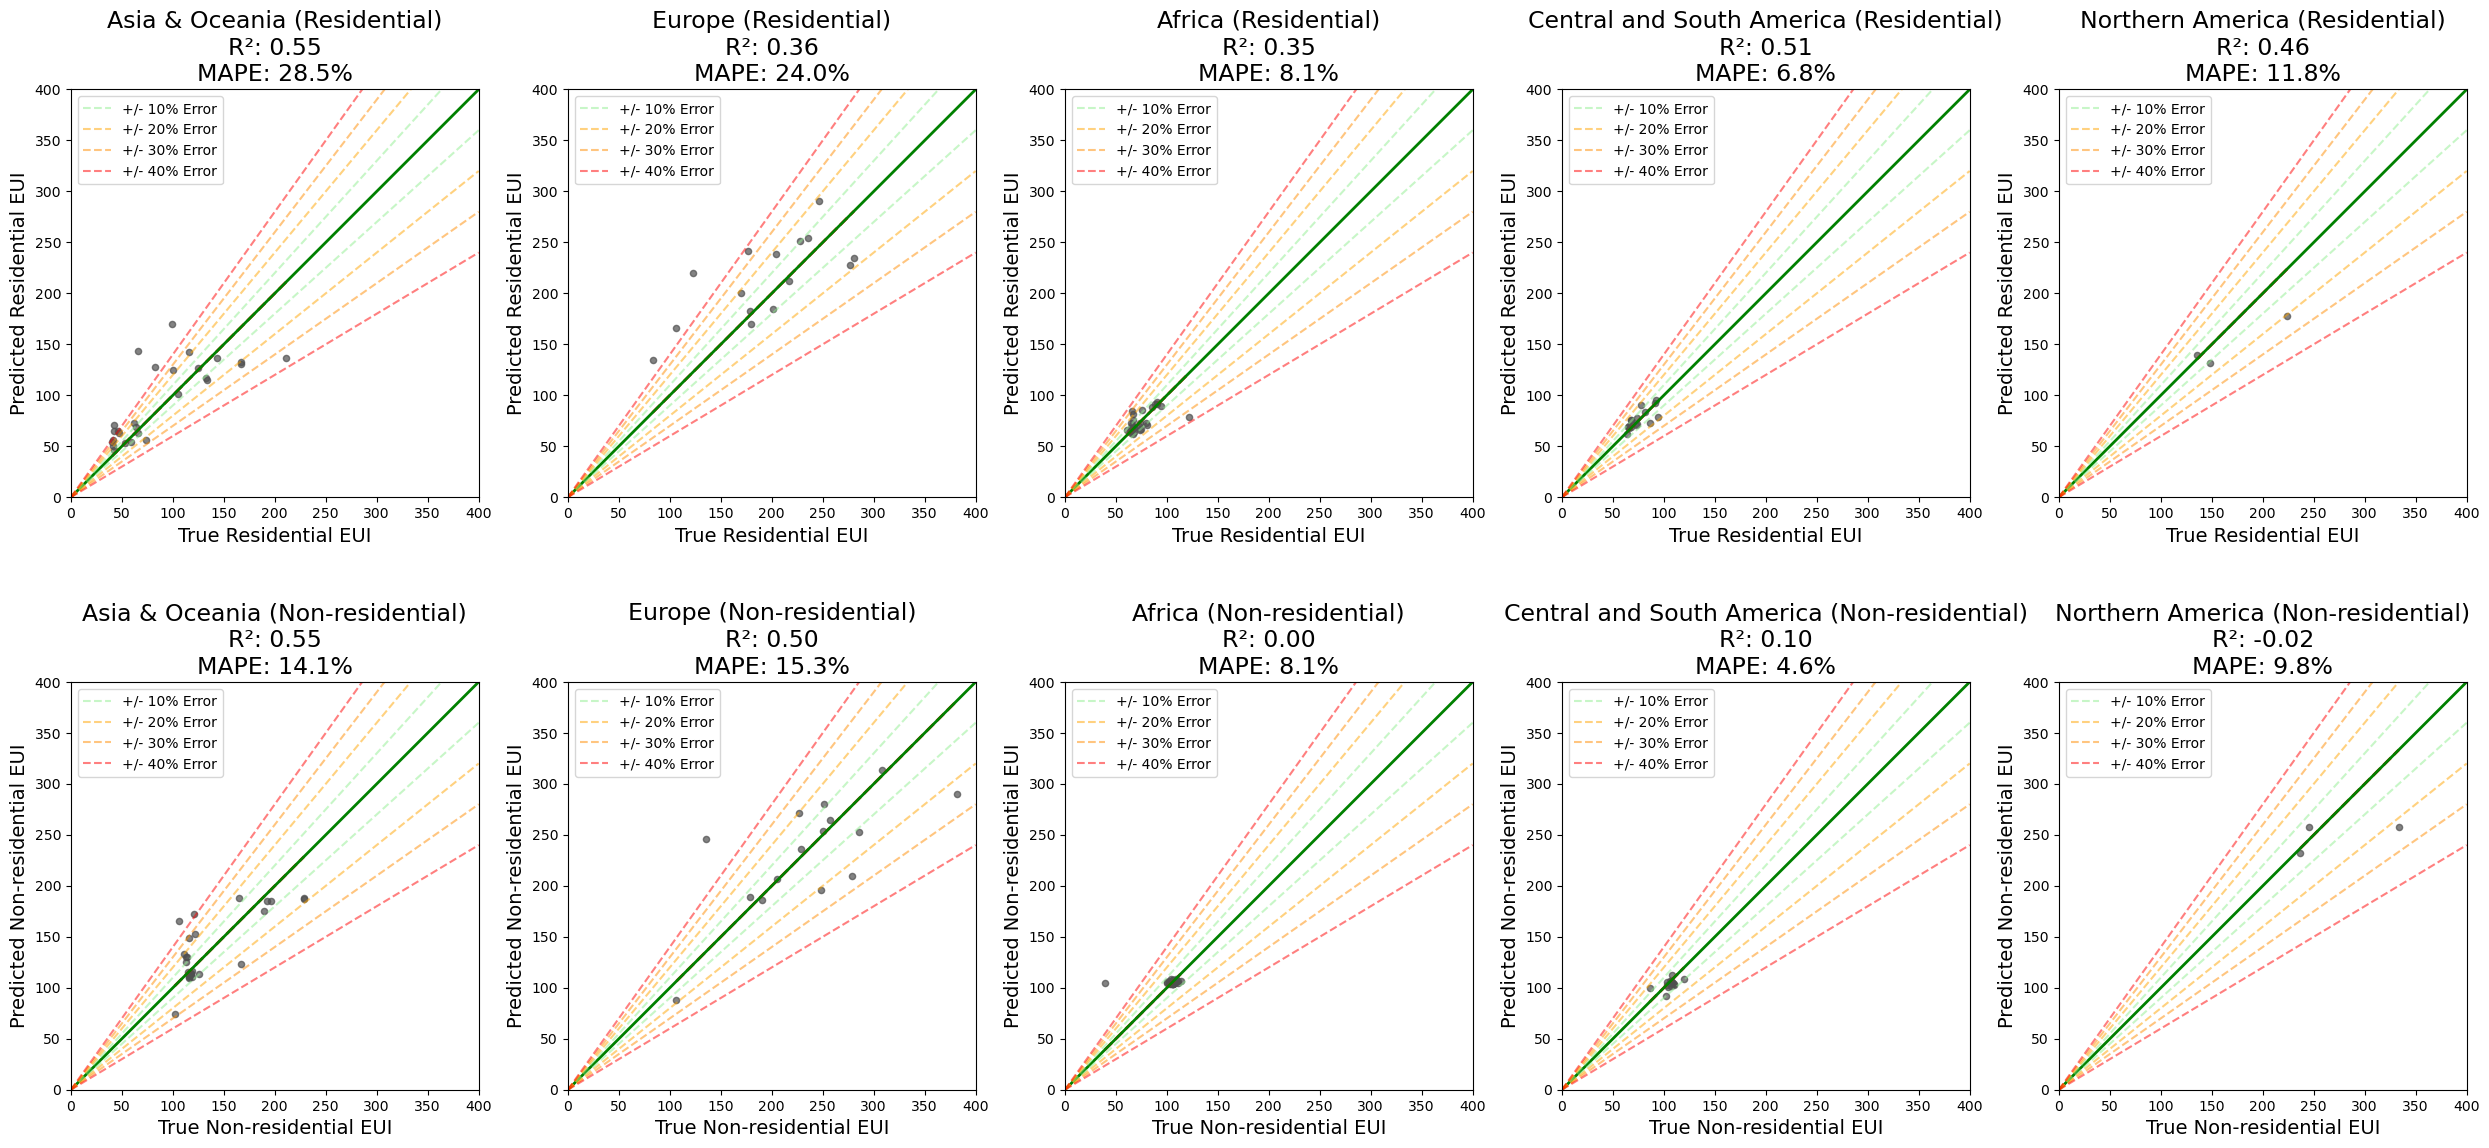

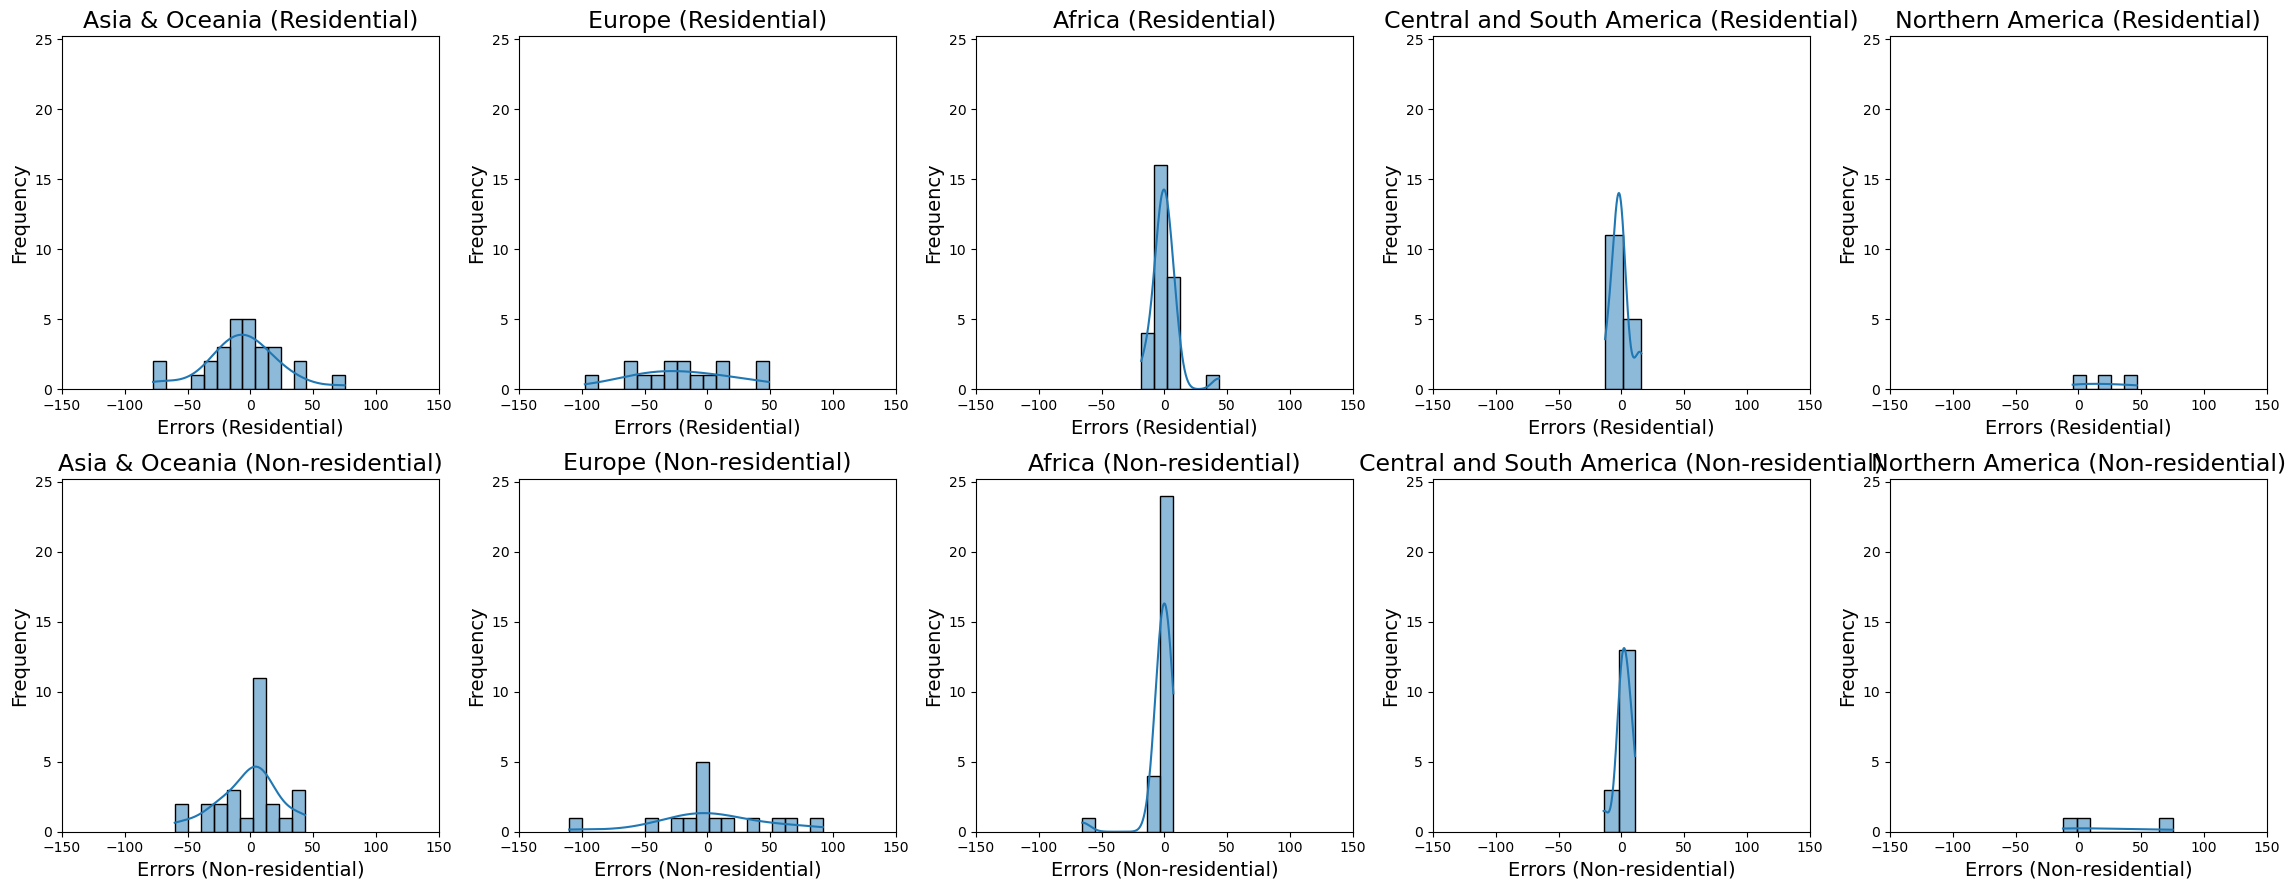

In [19]:
# Within-domain with Lasso
model_lasso_within = Lasso(**lasso_params)
results_lasso_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lasso_within,
    strategy='within_domain'
)

create_eui_comparison_plots(
    results_lasso_within, 
    save_path=f'../figures/model_plots/{feature_selection}/lasso_within_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lasso_within,
    save_path=f'../figures/model_plots/{feature_selection}/lasso_within_domain_error_distribution.png'
)


### Linear Regression - Lasso - Cross Domain

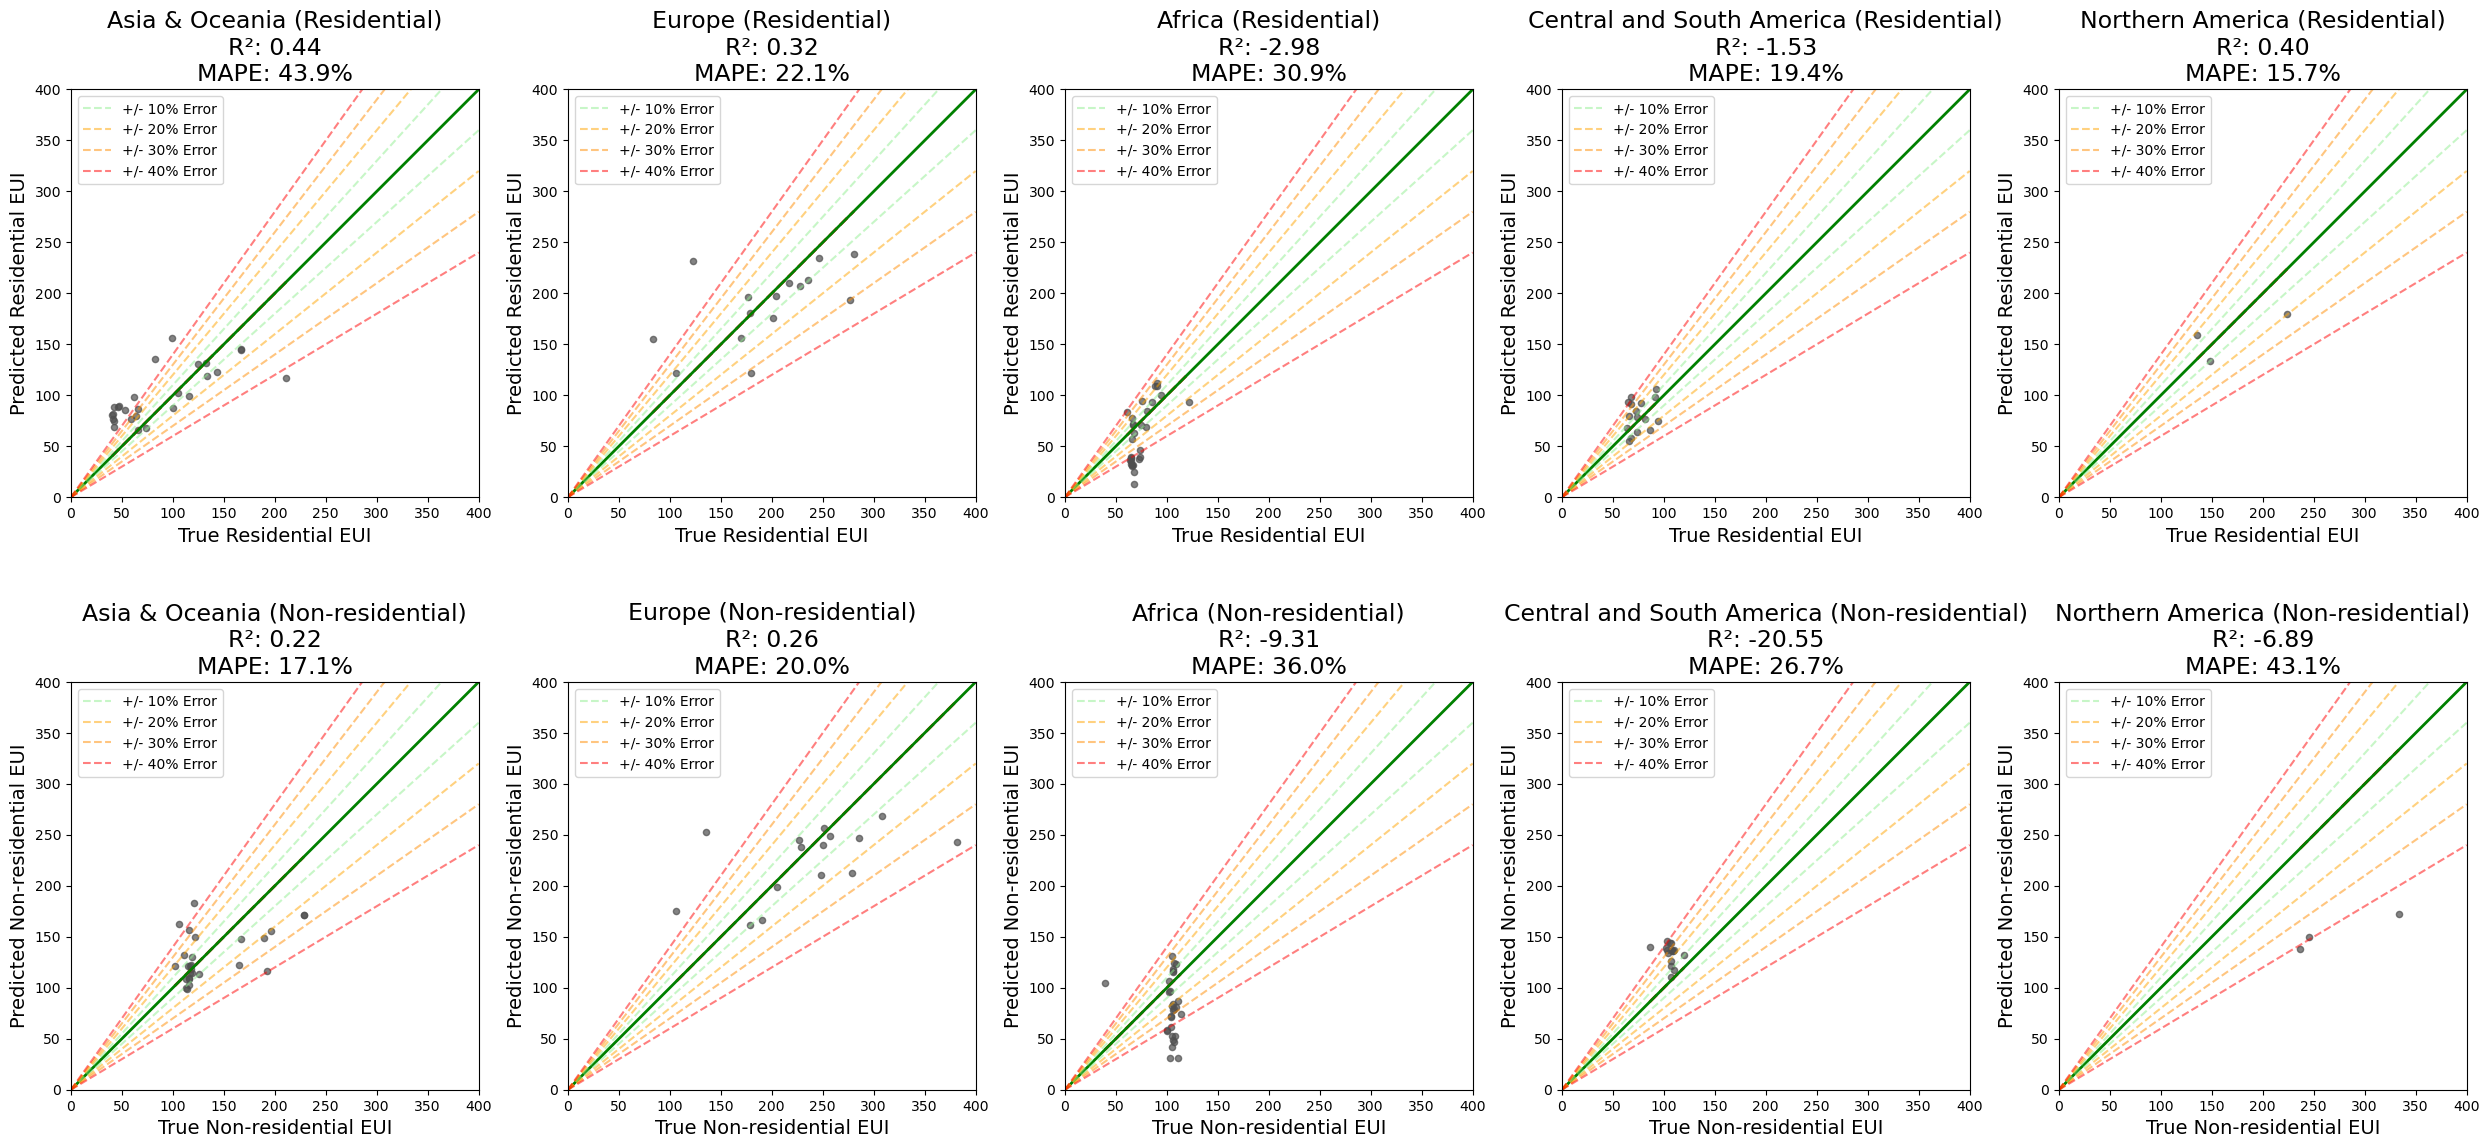

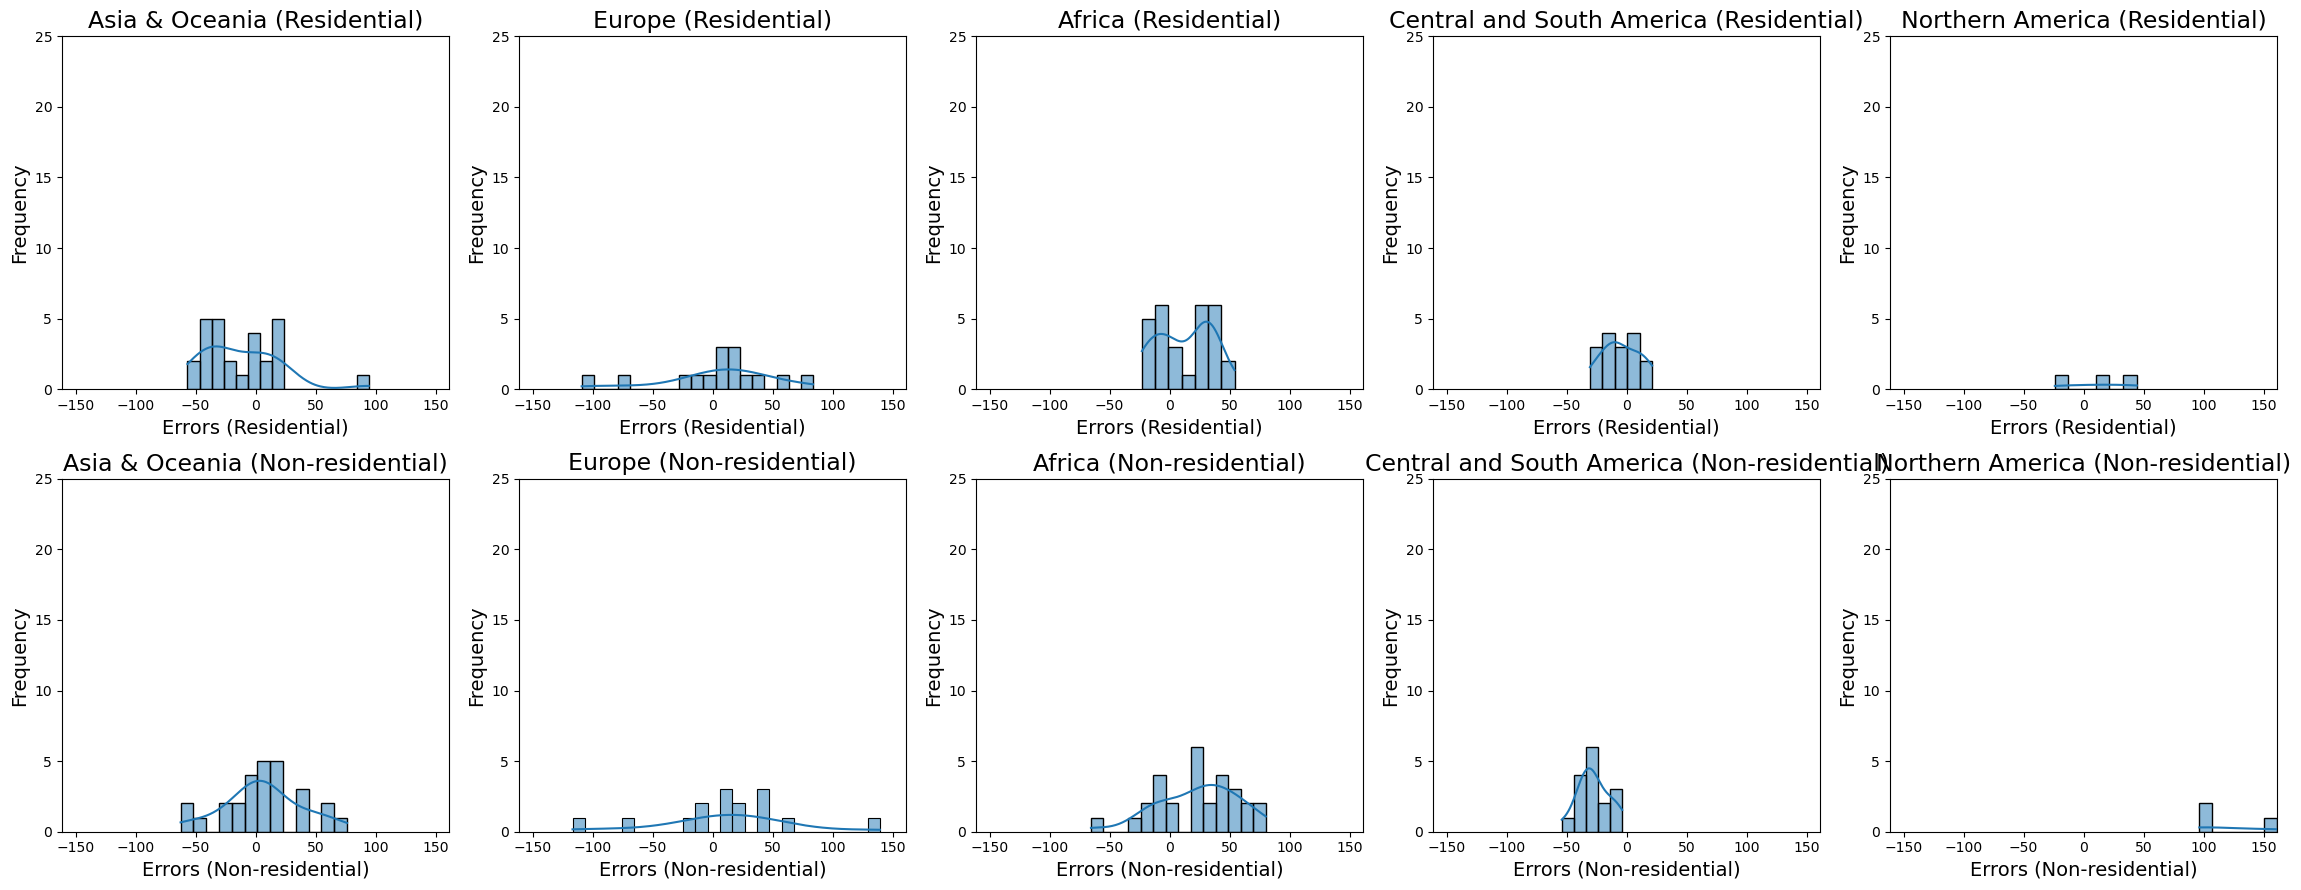

In [20]:
# Cross-domain with Lasso
model_lasso_cross = Lasso(**lasso_params)
results_lasso_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lasso_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(
    results_lasso_cross,
    save_path=f'../figures/model_plots/{feature_selection}/lasso_cross_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lasso_cross,
    save_path=f'../figures/model_plots/{feature_selection}/lasso_cross_domain_error_distribution.png'
)


### Linear Regression - Lasso - All Domain

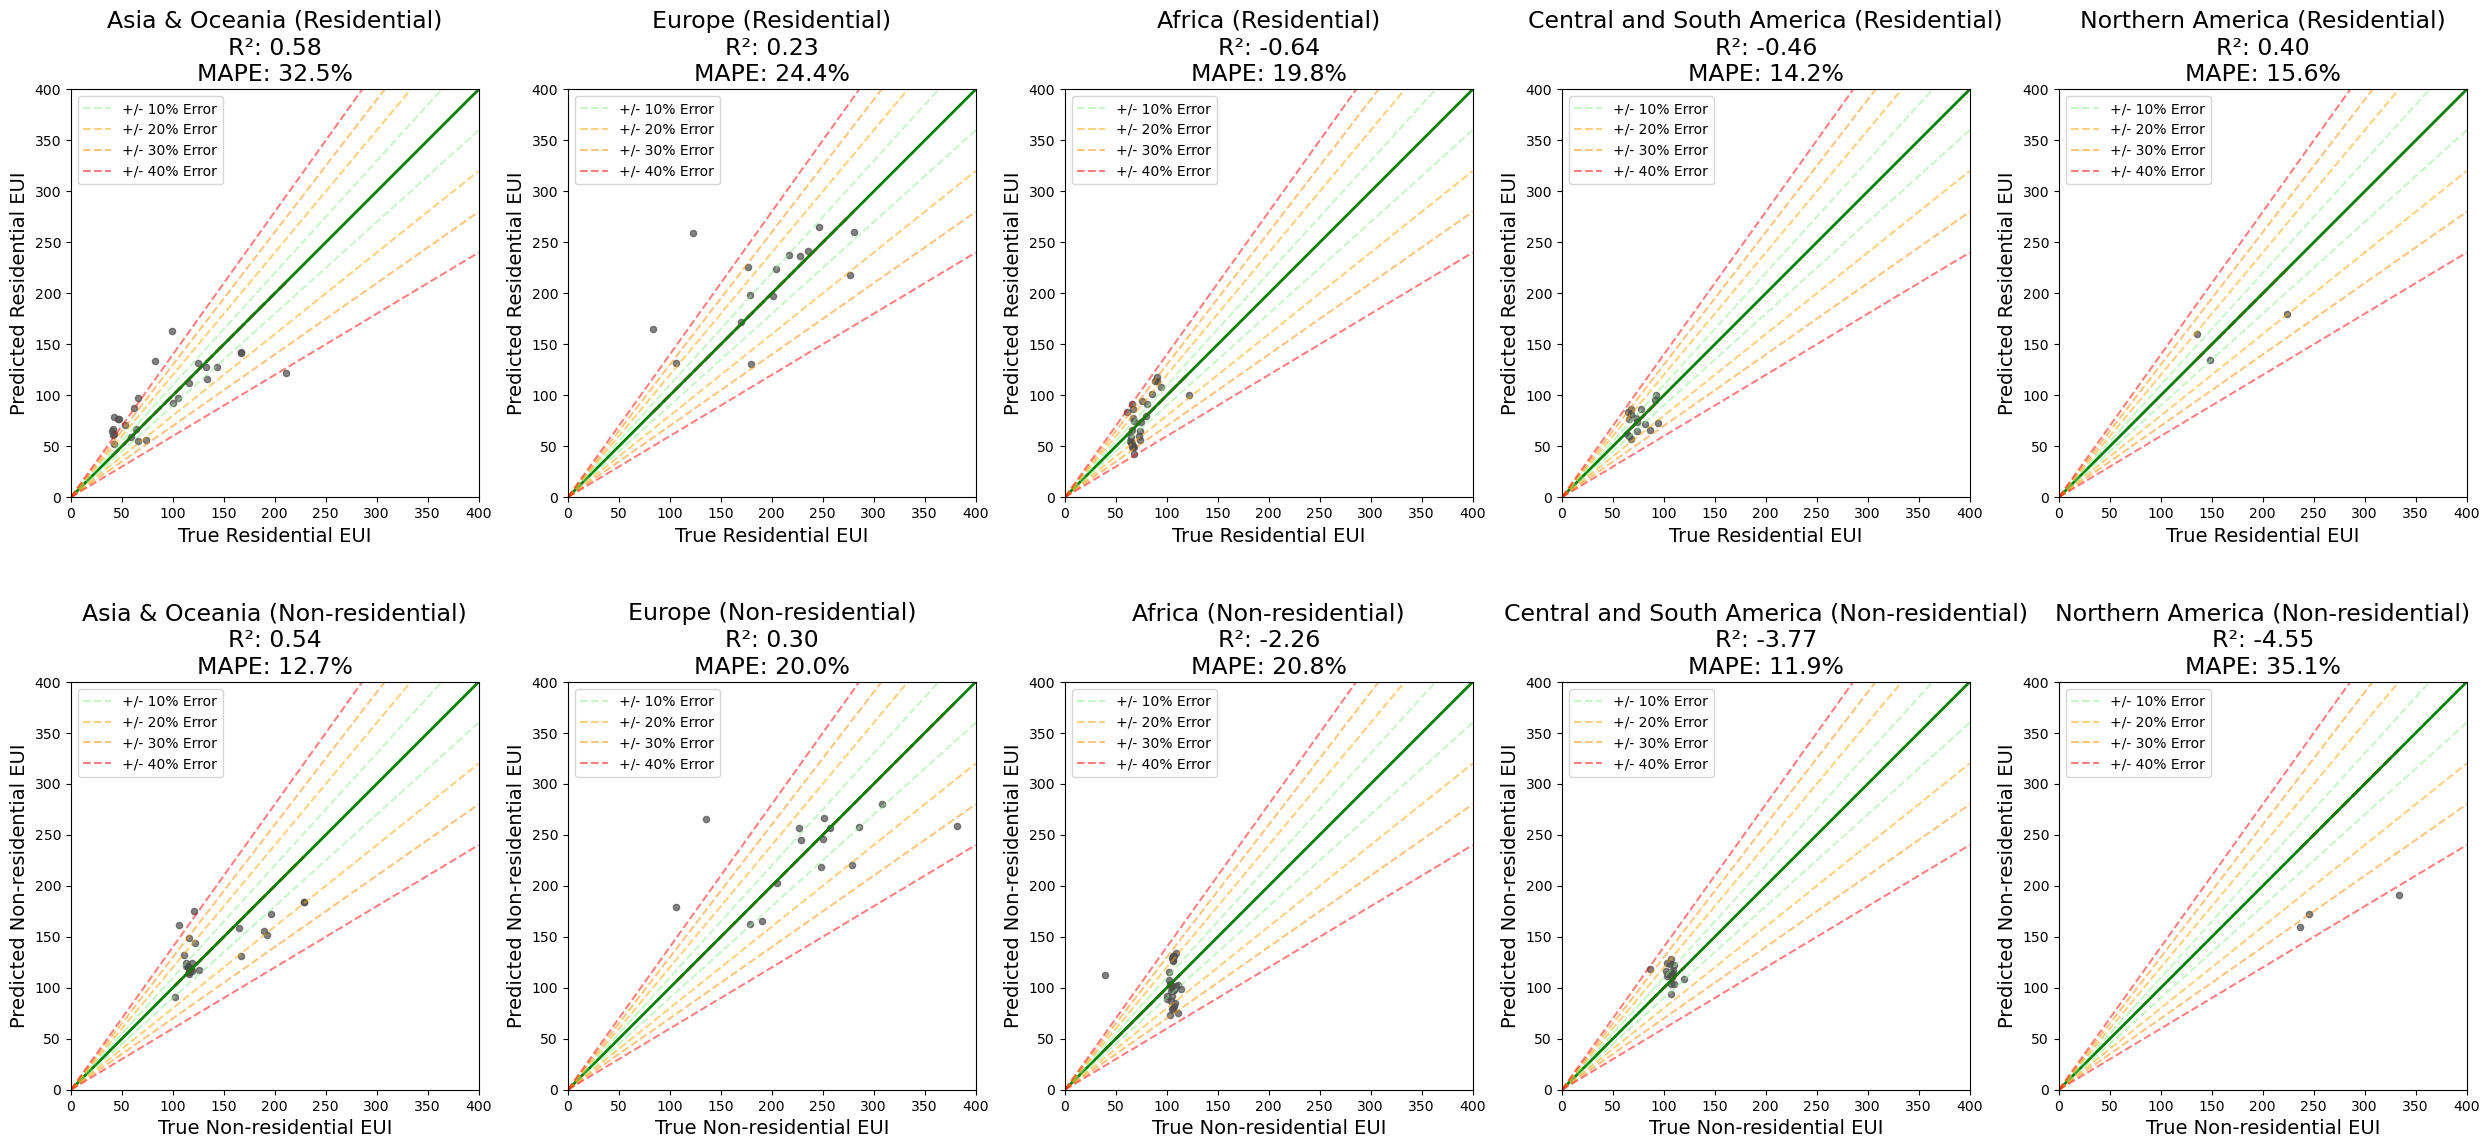

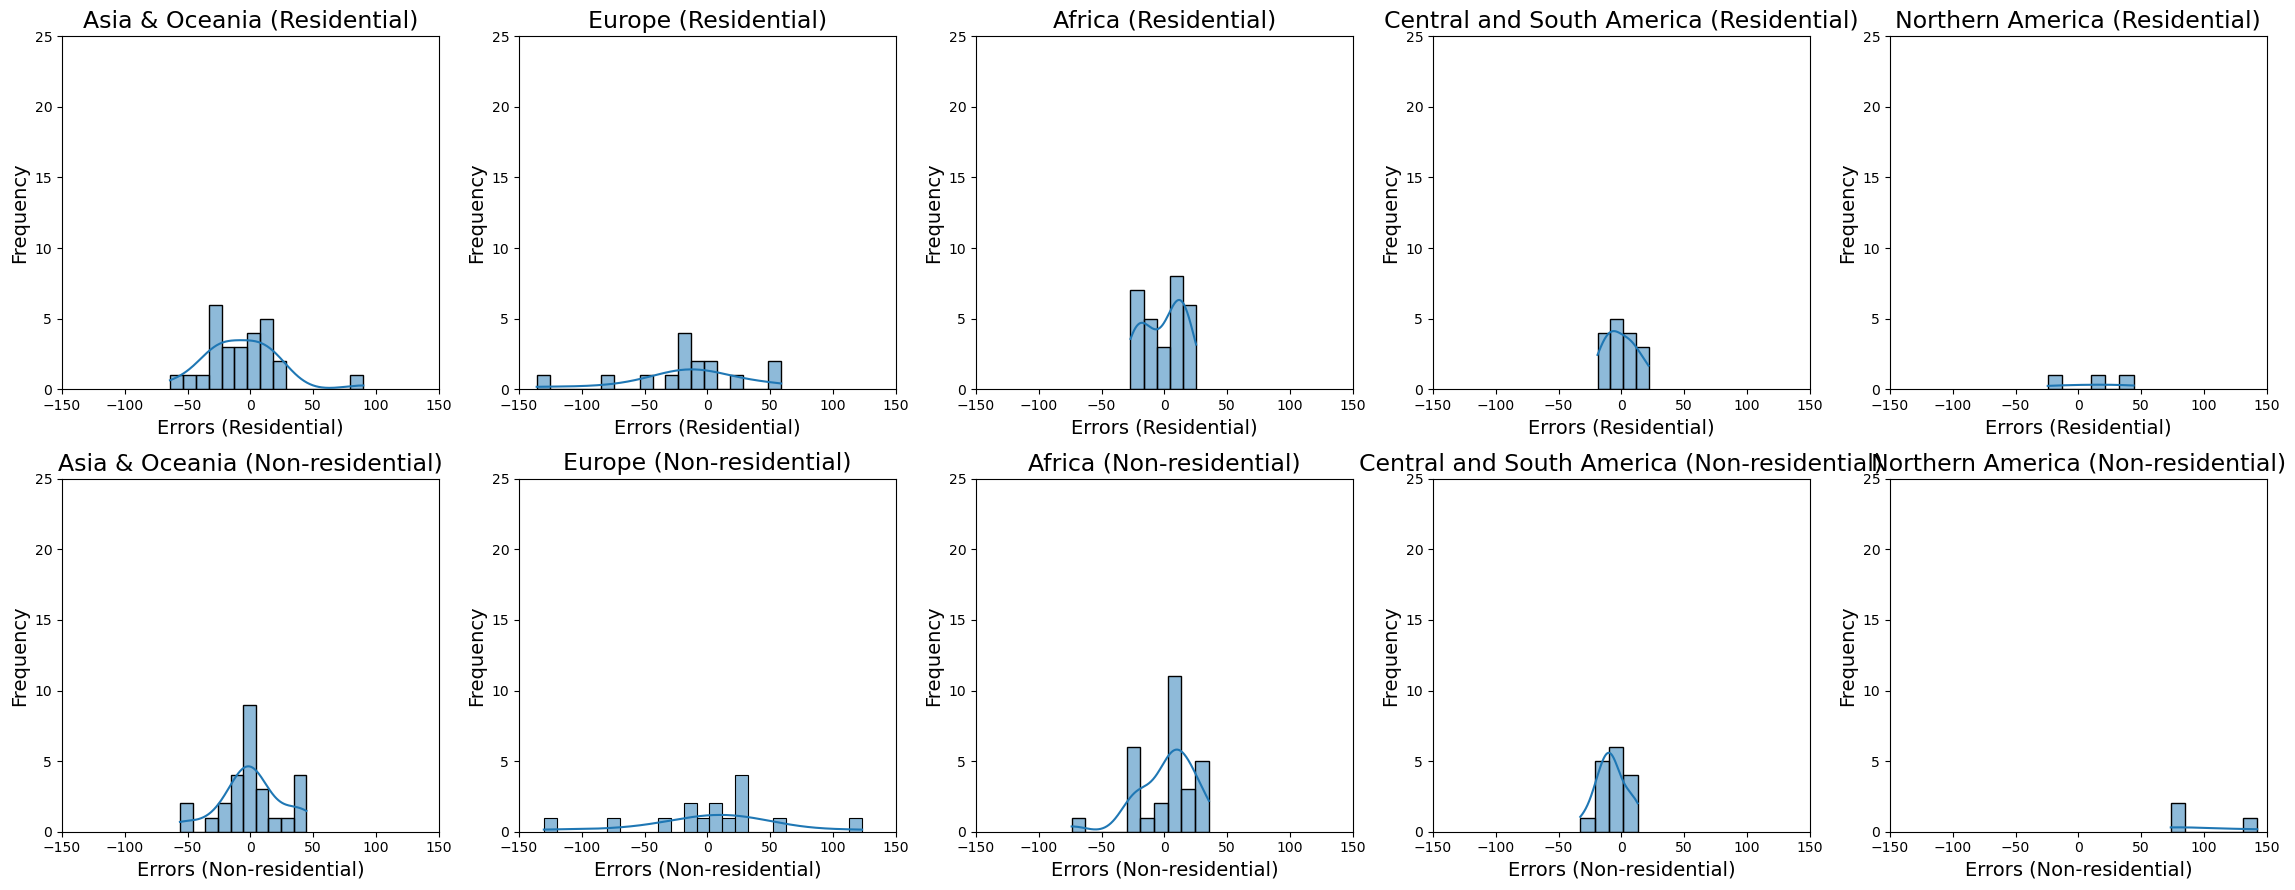

In [21]:
# All-domain with Lasso
model_lasso_all = Lasso(**lasso_params)
results_lasso_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lasso_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(
    results_lasso_all,
    save_path=f'../figures/model_plots/{feature_selection}/lasso_all_domain_eui_predictions.png'
)

create_error_distribution_plots(
    results_lasso_all,
    save_path=f'../figures/model_plots/{feature_selection}/lasso_all_domain_error_distribution.png'
)

In [22]:
LassoModel = lambda: Lasso(**lasso_params)

lasso_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LassoModel,  
   feature_abbreviations=feature_abbreviations,
   model_details="Lasso, " + ", ".join(f"{k} = {v}" for k, v in lasso_params.items())
)

lasso_detailed_results['Model'] = 'LR Lasso'
lasso_average_results = calculate_average_metrics(lasso_detailed_results).reset_index()
lasso_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Lasso   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Lasso   
3      Residential EUI (kWh/m2/year)  within_domain  LR Lasso   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
5      Residential EUI (kWh/m2/year)     all_domain  LR Lasso   

        Model Details                                      Features Used  \
0  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
1  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
2  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
3  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
4  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   
5  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, Urbanization_R...   

                                Features Abbreviated   MAPE     R²       MSE  \
0  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  10.38  0.227   987.775   
1  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  28.58 -7.257  4372.123   
2  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  20.10 -1.946  2988.315   
3  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  15.84  0.447   789.427   
4  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  26.40 -0.668  1032.504   
5  HDD | CDD | URB | Lat | Long | HDI | EDU | Inc...  21.30  0.023   932.253   

     RMSE     MAE   WAPE  
0  26.888  18.280   9.56  
1  56.593  49.177  27.64  
2  44.027  36.876  18.86  
3  24.402  18.769  14.76  
4  30.586  25.192  22.88  
5  27.664  22.108  18.86

In [23]:
lasso_detailed_results.to_csv(f'../results/{feature_selection}/{timestamp}_lasso_detailed_results.csv')
lasso_average_results.to_csv(f'../results/{feature_selection}/{timestamp}_lasso_average_results.csv')
